## Customer Churn Prediction



### `Business Understanding`



**Business Objective:** The primary objective of Vodafone Corporation is to reduce customer churn, a prevalent issue across many industries, especially in the telecommunications sector. The ultimate goal is to predict the likelihood of a customer discontinuing their service, identify the main factors contributing to customer churn, and develop strategies to retain customers and mitigate this issue.

`Key Performance Indicators (KPIs)` for this objective could include the churn rate, customer lifetime value, and customer retention rate.

**Understanding the Current Situation:** Currently, Vodafone has access to a wealth of customer data, supplied by the business development unit and the marketing and sales team. This data will be leveraged to build machine learning models capable of predicting customer churn. The current churn rate serves as a benchmark for measuring the effectiveness of the implemented strategies.

**Data Mining Goals:** The aim of data mining in this context is to develop a classification model that can predict whether a customer is likely to churn. This is a supervised learning problem where the model will be trained on the provided data and then used to make predictions on new data. The model should also be able to identify the key features or indicators that lead to customer churn. The accuracy, precision, recall, and F1 score of the model can serve as KPIs for this goal.

**Project Plan:** The project plan involves several steps. First, the data will be prepared for analysis, which may include cleaning the data, handling missing values, and encoding categorical variables. Next, appropriate machine learning algorithms will be selected for model construction. The model will then be trained and tested using the prepared data. The model’s performance will be evaluated using suitable metrics, such as accuracy, recall, precision, and F1 score. Finally, the model will be deployed for predicting customer churn. The key indicators identified by the model can then be used to devise effective strategies for customer retention. The impact of these strategies can be measured using KPIs such as the reduction in churn rate and increase in customer retention rate.

By aligning these steps with the overall business strategy, the company can ensure a data-driven approach to tackling customer churn, ultimately leading to improved customer retention and business growth.

**Data for the Project:**

The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model. 
The first 3000 records of the dataset can be found in a database which will have to be accessed remotely.
The second part of the data is hosted on this GitHub Repository in a file called LP2_Telco-churn-second-2000.csv. Whiles the final data set needed for this project can be found in OneDrive.

`Target:`
- Churn — Whether the customer churned or not (Yes, No)

`Numeric Features:`

- Tenure — Number of months the customer has been with the company
- MonthlyCharges — The monthly amount charged to the customer
- TotalCharges — The total amount charged to the customer

`Categorical Features:`

- CustomerID
- Gender — M/F
- SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
- Partner — Whether customer has a partner or not (Yes, No)
- Dependents — Whether customer has dependents or not (Yes, No)
- PhoneService — Whether the customer has a phone service or not (Yes, No)
- MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
- InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
- OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
- OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
- DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
- TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
- StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
- StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
- Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
- PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

###  Hypothesis


`Null Hypothesis (H0):` Longer tenure does not impact the likelihood of customer churn.

`Alternative Hypothesis (H1):`There is a correlation between longer tenure and the likelihood of customer churn.

`Null Hypothesis (H0):` There is no significant correlation between contract type and customer churn.

`Alternative Hypothesis (H0):` There is a significant correlation between contract type and customer churn.




### Analytical Questions

**Question 1:** What is the churn rate among customers?

**Question 2:** What are the most popular internet services among customers?

**Question 3:** What is the proportion of customers who churn compared to those who remain? 

**Question 4:** How does the presence of partners or dependents affect customer behavior? 

**Question 5:** What is the distribution of tenure among customers?

**Question 6:** What are the most popular internet services among customers?

**Question 7:** How many customers have online security, online backup, device protection, and tech support?

**Question 8:** How many customers have streaming TV or streaming movie services?

**Question 9:** What is the distribution of monthly charges and total charges among customers?

**Question 10:** What are the most common payment methods?

**Question 11:** What types of contracts are most common among customers?








## `Data Understanding`

#### Importations

In [2]:
# Data Analysis and Manipulation of Packages

# Data handling
import pyodbc     
from dotenv import dotenv_values   
import pandas as pd
import numpy as np

# Vizualisation
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn. preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

# Display all columns and rows 
pd.set_option('display.max_columns', None)

#### Extracting Data

In [3]:
# Load from SQL Database source

# Load environment variables from .env file into a dictionary
from dotenv import dotenv_values
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

# Create a connection string
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
import pyodbc
connection = pyodbc.connect(connection_string)


In [4]:
# SQL query to extract the data 
query = "SELECT * from dbo.LP2_Telco_churn_first_3000"
 
 # Execute the SQL query to load data into pandas Dataframe
data_1= pd.read_sql(query, connection)



In [5]:
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
data_1.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,False,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,False,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False
2999,1A1:U3001038-RQOST,Male,False,True,True,19,True,False,No,None,None,None,None,None,None,Month-to-month,False,Mailed check,20.600000,414.950012,False


In [7]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'

# Use pandas to load the csv file
data_2 = pd.read_csv(url)


In [8]:
data_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
data_1.columns 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data_2.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Merge Dataset
Customer_churn = pd.concat([data_1, data_2], ignore_index=True)
Customer_churn.to_csv('Customer_churn.csv')

In [12]:
Customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [13]:
Customer_churn.shape

(5043, 21)

In [14]:
Customer_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Clean Dataset

In [15]:
# Change column names to lowercase
Customer_churn.columns = Customer_churn.columns.str.lower()


In [16]:
Customer_churn = Customer_churn.replace({True: 'Yes', False: 'No'})

In [17]:
#Converting TotalCharges column to numeric

Customer_churn['totalcharges'] = pd.to_numeric(Customer_churn['totalcharges'], errors='coerce')

In [18]:
# # Round values  to two decimal places

Customer_churn['monthlycharges'] = Customer_churn['monthlycharges'].round(2)
Customer_churn['totalcharges'] = Customer_churn['totalcharges'].round(2)


#### Exploratory Data Analysis - (EDA)

The objective of hands-on exploratory data analysis (EDA) is to delve deeper into the data, pinpoint potential issues, and uncover opportunities for further investigation. By integrating fundamental statistics, visual representation methods, and logical reasoning, you can gain a comprehensive understanding of the data, which paves the way for the generation of insights and the formulation of hypotheses for more detailed analysis.

In [19]:
Customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [20]:
# Get summary statistics for numeric columns 
Customer_churn.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,5043.000000,5043.000000,5043.000000,5035.000000
mean,0.162403,32.576641,65.090214,2302.062860
std,0.368857,24.529807,30.068133,2269.483575
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,9.000000,35.775000,417.675000
50%,0.000000,29.000000,70.550000,1401.150000
75%,0.000000,56.000000,90.050000,3862.000000
max,1.000000,72.000000,118.650000,8670.100000


In [21]:
# Get summary statistics for numeric columns 
Customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5043.0,0.162403,0.368857,0.0,0.000,0.00,0.00,1.00
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.00,56.00,72.00
monthlycharges,5043.0,65.090214,30.068133,18.4,35.775,70.55,90.05,118.65
totalcharges,5035.0,2302.062860,2269.483575,18.8,417.675,1401.15,3862.00,8670.10


In [22]:
# Get summary statistics for all columns 
Customer_churn.describe(include=['O'])

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,5043,5043,5043,5043,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5042
unique,5043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
freq,1,2559,2585,3482,4554,2424,2248,2507,2231,2219,2472,2018,1982,2744,2996,1700,3706


In [23]:
Customer_churn.duplicated().sum()

0

In [24]:
Customer_churn.nunique()

customerid          5043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1456
totalcharges        4770
churn                  2
dtype: int64

In [25]:
Customer_churn.isna().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

In [26]:
(Customer_churn.isnull().sum()/(len(Customer_churn)))*100

customerid           0.000000
gender               0.000000
seniorcitizen        0.000000
partner              0.000000
dependents           0.000000
tenure               0.000000
phoneservice         0.000000
multiplelines        5.334127
internetservice      0.000000
onlinesecurity      12.908983
onlinebackup        12.908983
deviceprotection    12.908983
techsupport         12.908983
streamingtv         12.908983
streamingmovies     12.908983
contract             0.000000
paperlessbilling     0.000000
paymentmethod        0.000000
monthlycharges       0.000000
totalcharges         0.158636
churn                0.019829
dtype: float64

In [27]:
cat_cols=Customer_churn.select_dtypes(include=['object']).columns
num_cols = Customer_churn.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')
Numerical Variables:
['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']


#### Univariate Analysis

#### Check for skewness and outliers 

seniorcitizen
Skew : 1.83
Kurtosis : 1.35


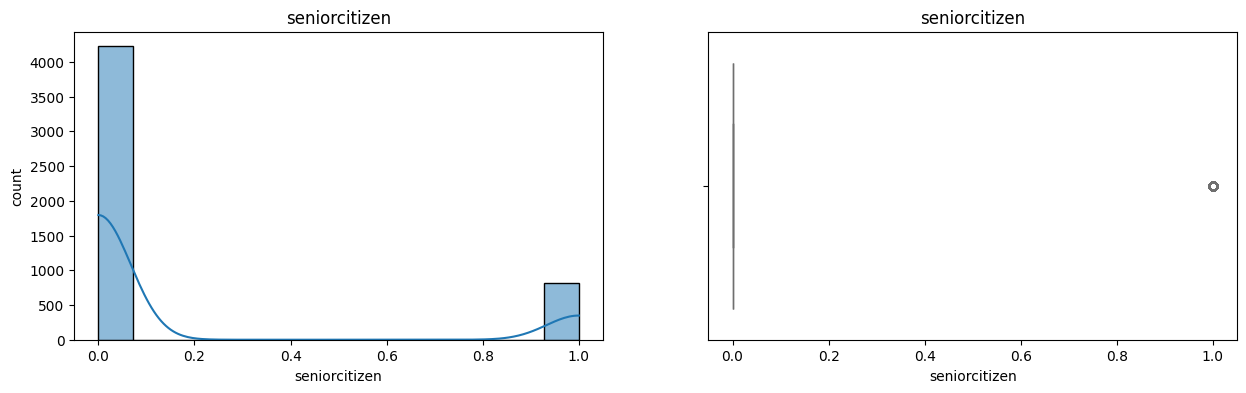

tenure
Skew : 0.23
Kurtosis : -1.39


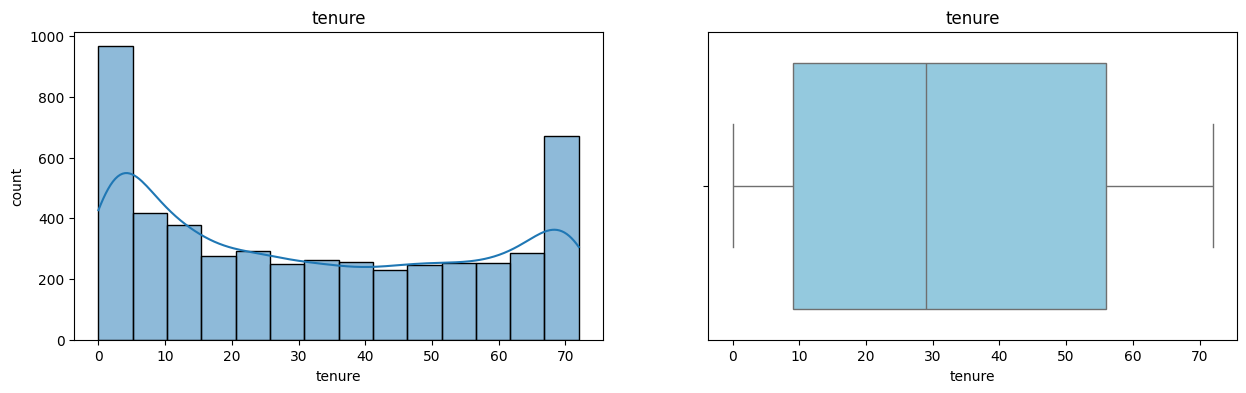

monthlycharges
Skew : -0.24
Kurtosis : -1.25


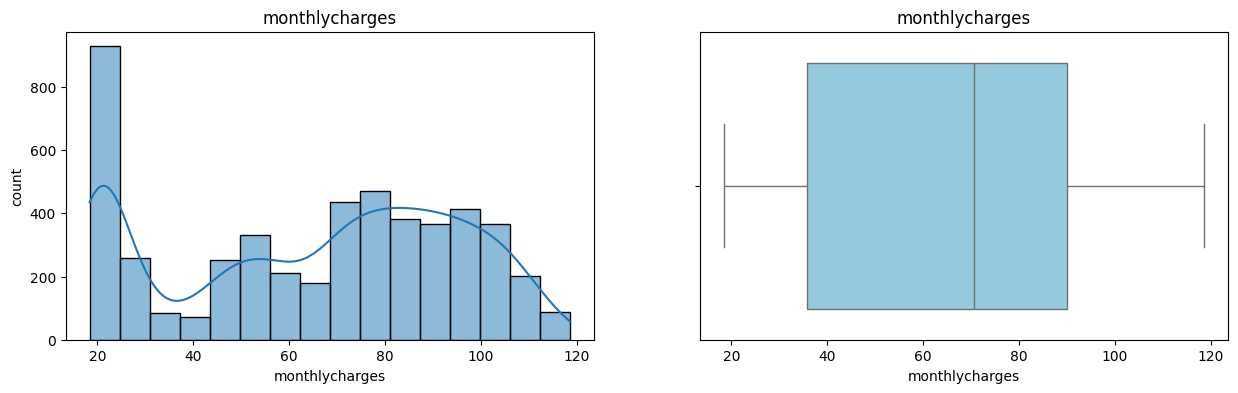

totalcharges
Skew : 0.94
Kurtosis : -0.28


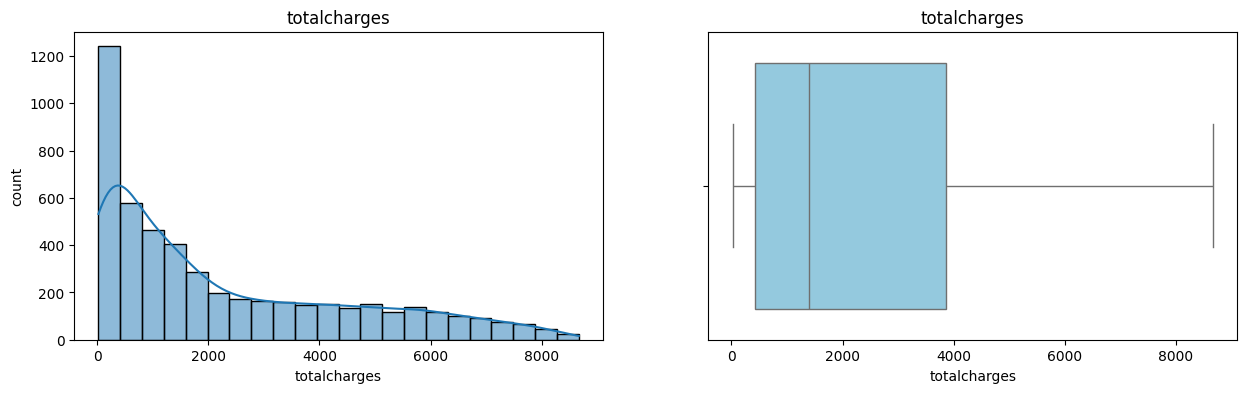

In [28]:
for col in num_cols:
    print(col)
    print('Skew :', round(Customer_churn[col].skew(), 2))
    print('Kurtosis :', round(Customer_churn[col].kurtosis(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=Customer_churn, x=col, kde=True, label=col)
    plt.title(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Customer_churn[col], color = 'skyblue')
    plt.title(col)
    plt.show()

In [29]:
num_col = ["tenure", "seniorcitizen", "monthlycharges", "totalcharges"]
skew = Customer_churn[num_col].skew().sum()
print(f'The skewness of the numerical features in the dataset is {round(skew, 2)}')

The skewness of the numerical features in the dataset is 2.76


#### Check for Distributions

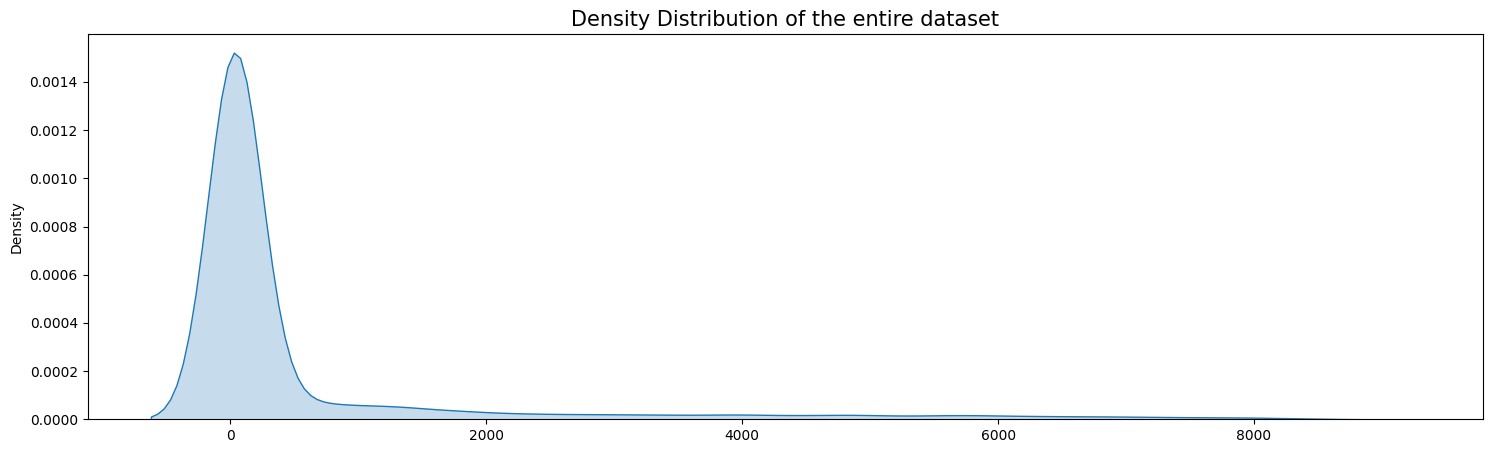

In [30]:
# Using density plot to check correlation of Categorical variables
plt.figure(figsize=(18, 5))
sns.kdeplot(Customer_churn.drop(['customerid', 'gender', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
        'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
        'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
        'paymentmethod', 'churn'], axis=1).values.ravel(), fill=True)
plt.title('Density Distribution of the entire dataset', fontsize=15)
plt.show()

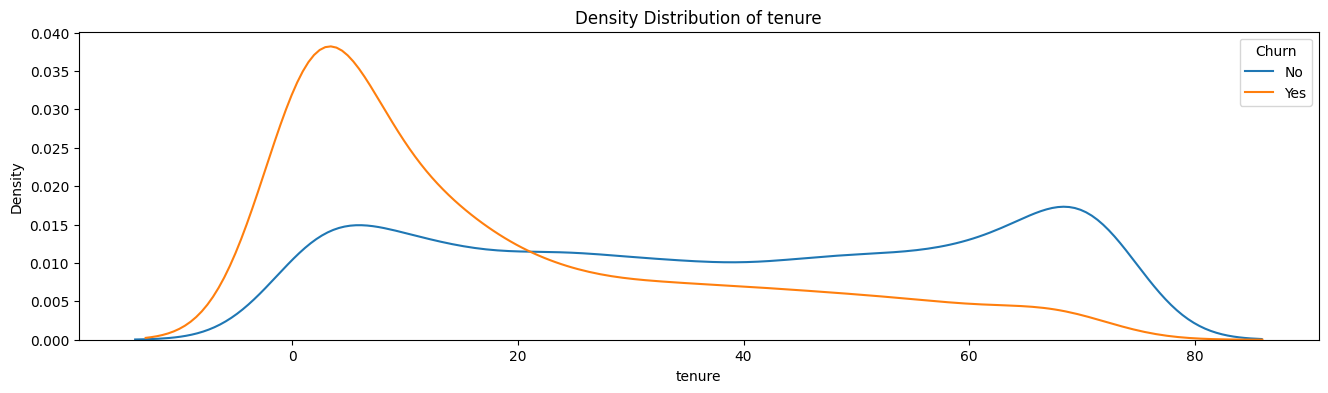

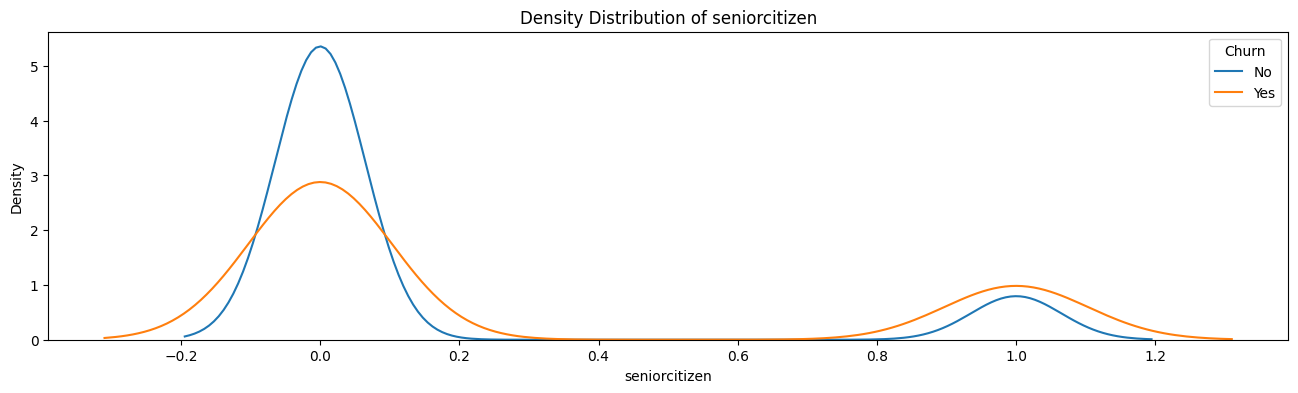

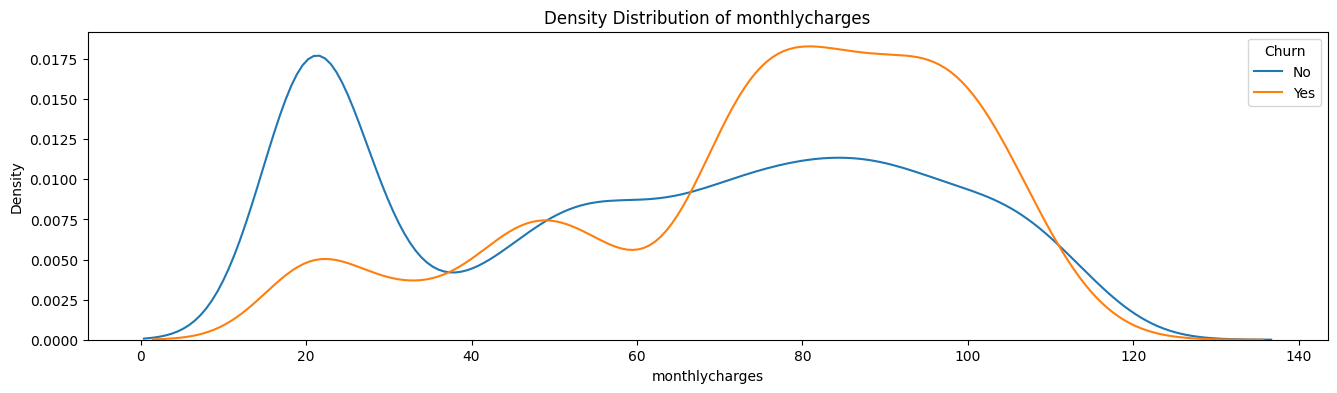

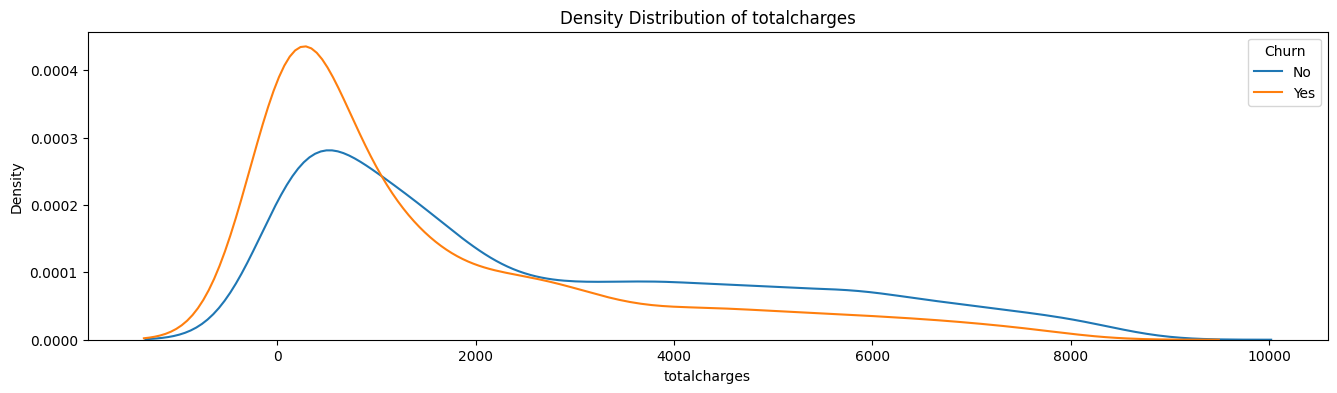

In [31]:
# Using density plot to check correlation of Churn with Numerical variables
for column in ["tenure", "seniorcitizen", "monthlycharges", "totalcharges"]:
    plt.figure(figsize=(16,4))
    for category in Customer_churn["churn"].unique():
        sns.kdeplot(Customer_churn[Customer_churn["churn"]==category][column], label=category)
    plt.title('Density Distribution of ' + column)  
    plt.legend(title='Churn')
    plt.show()


#### Check for value counts

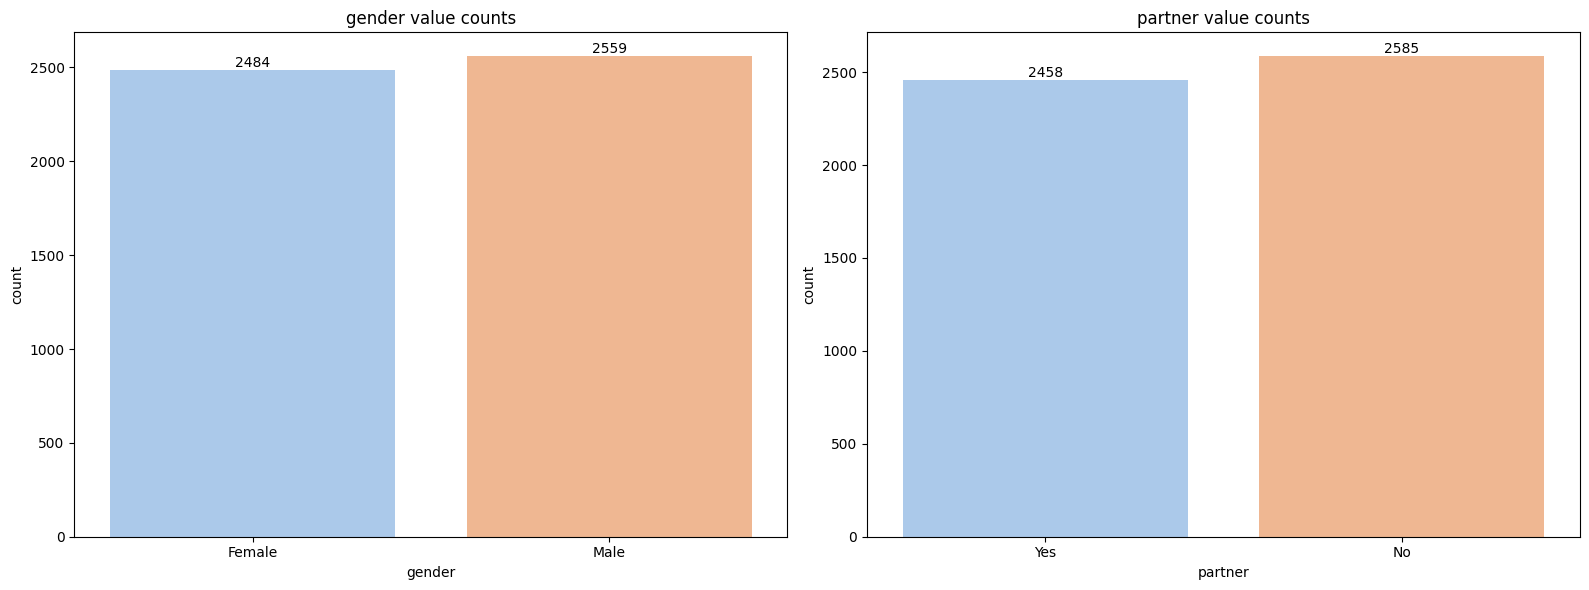

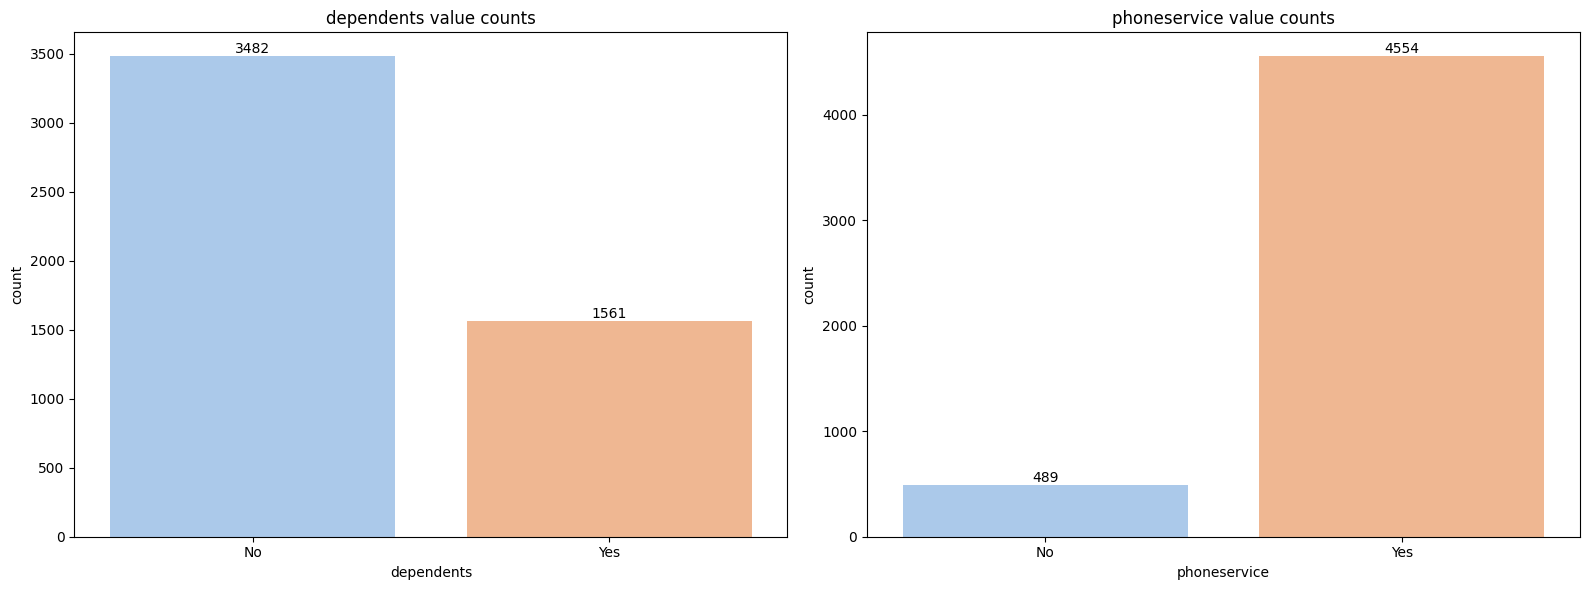

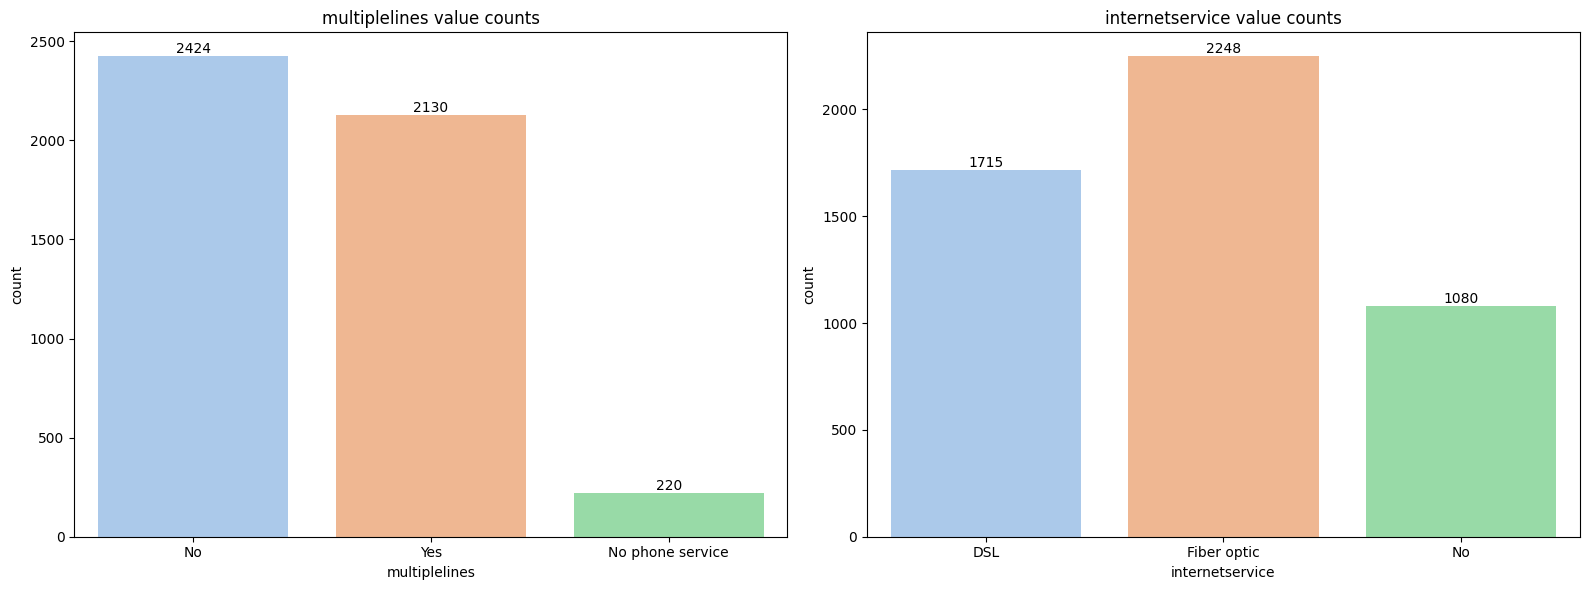

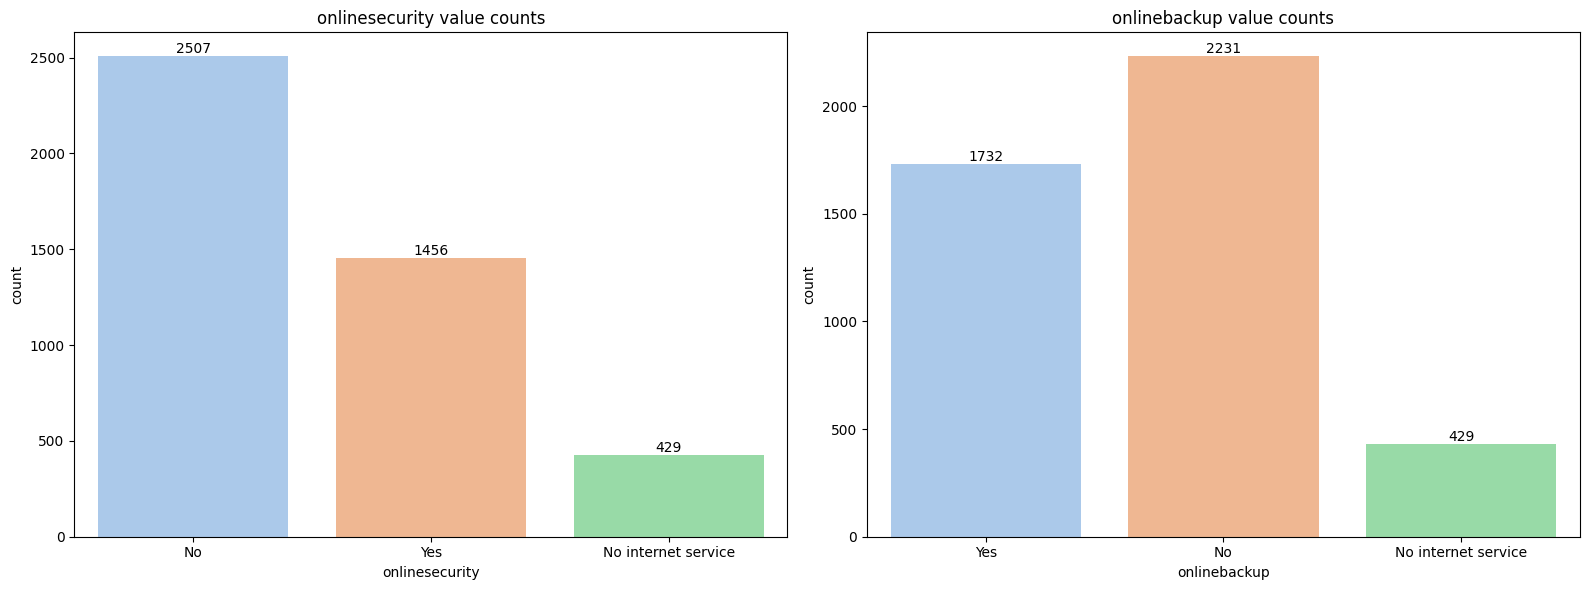

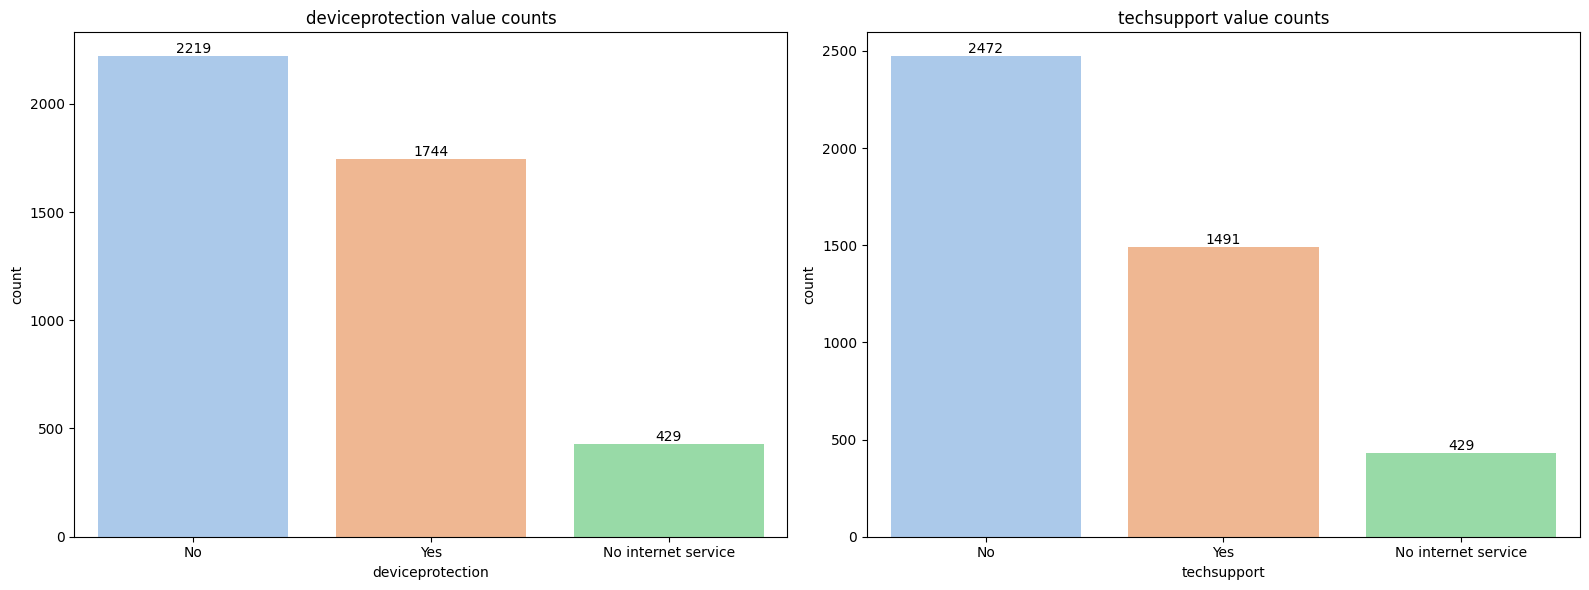

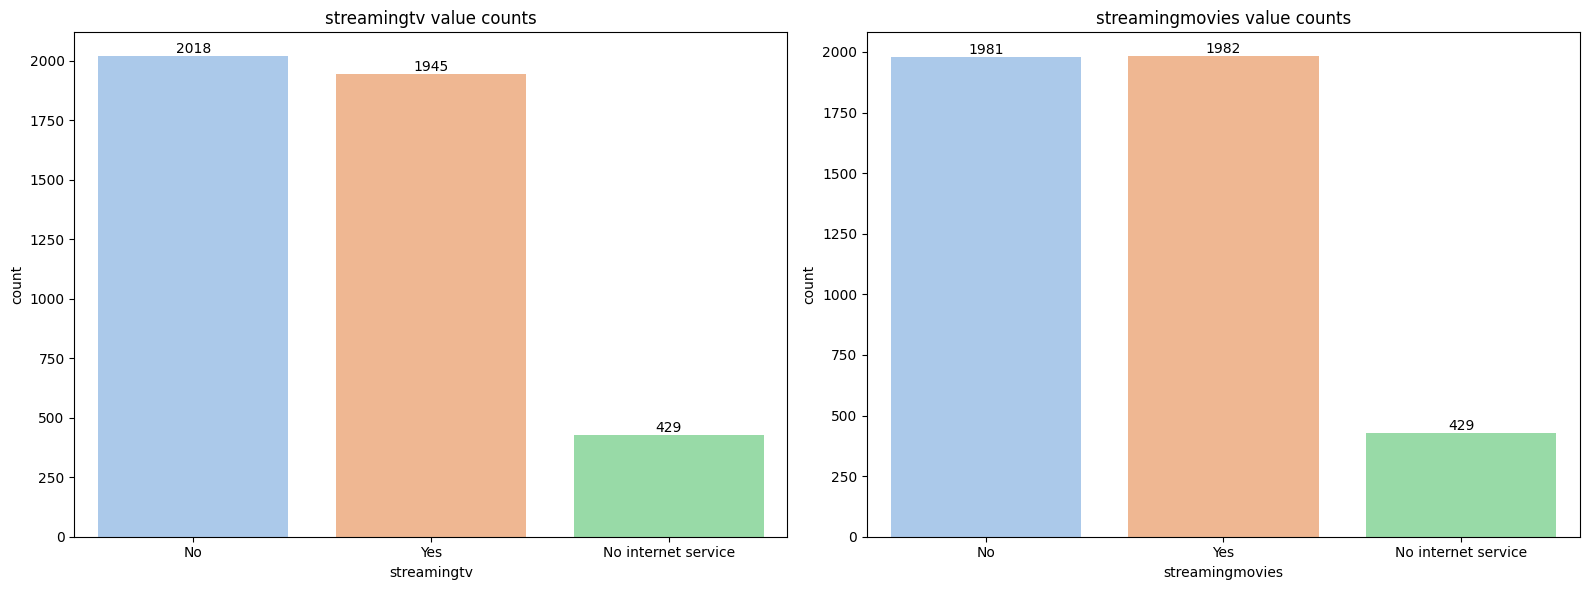

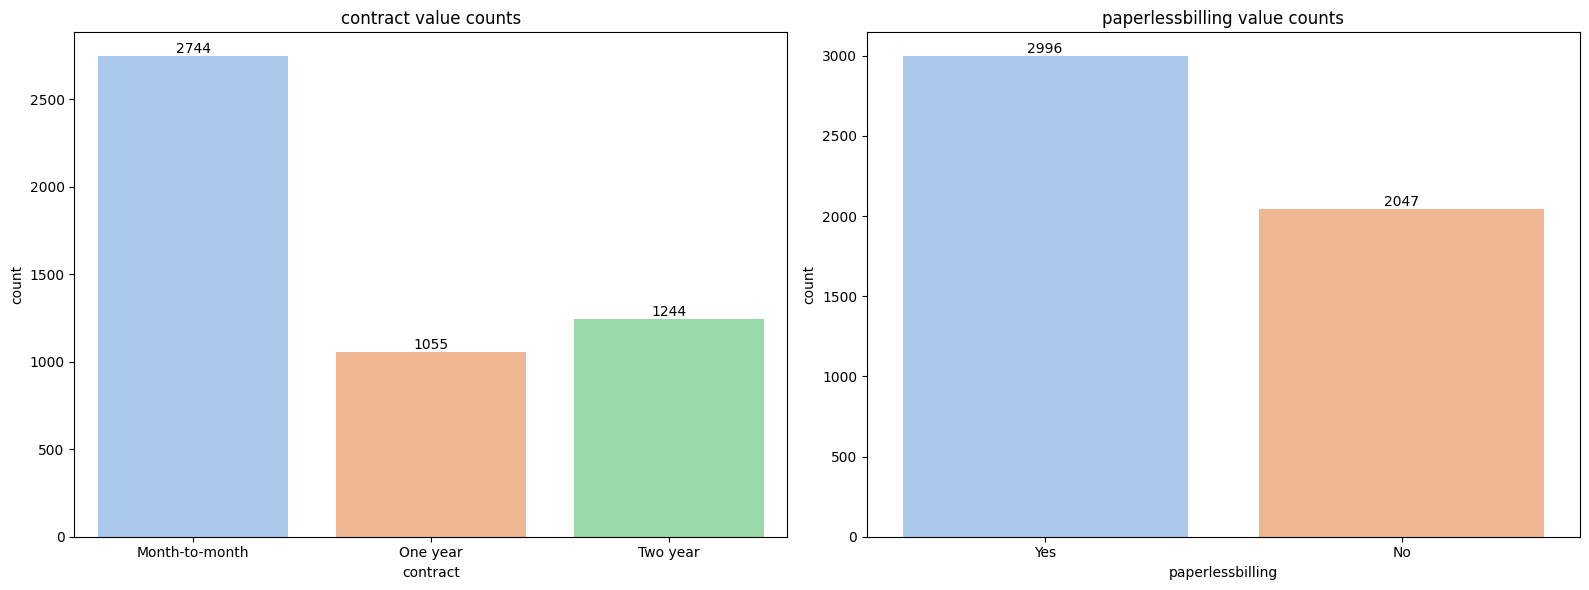

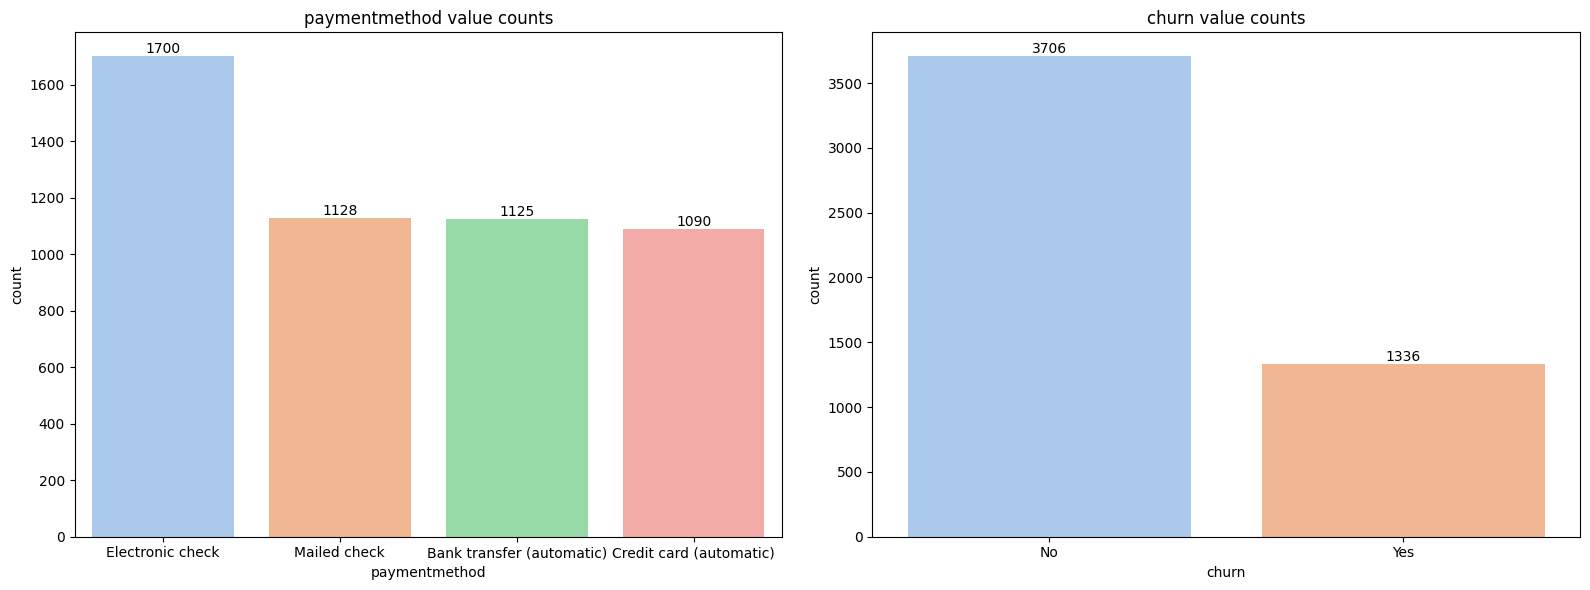

In [32]:
# Assuming 'Customer_churn' is your DataFrame containing categorical data

# Drop the 'customerid' column from the DataFrame
Customer_churn = Customer_churn.drop(columns=['customerid'])

# Select all columns with object (categorical) data type
obj_cols = Customer_churn.select_dtypes(include='object').columns

# Calculate the number of grids needed
n_grids = len(obj_cols) // 2

# Define a custom color palette (replace with your desired colors)
custom_palette = sns.color_palette("pastel")  

# Loop through each grid
for i in range(n_grids):
    # Create a new figure for each grid
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Loop through each subplot in the grid
    for j in range(2):
        # Calculate the current column index
        col_index = i * 2 + j

        # Check if the current column index is within the list length
        if col_index < len(obj_cols):
            # Get the current column name
            col = obj_cols[col_index]

            # Create a countplot of the column using seaborn with custom palette
            ax = sns.countplot(x=col, data=Customer_churn, ax=axes[j], palette=custom_palette)

            # Set the title of the countplot
            ax.set_title(f"{col} value counts")

            # Add data values to the bars
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width()/2, 
                        p.get_height(), 
                        f"{p.get_height():.0f}", 
                        ha='center', 
                        va='bottom')

    # Show the countplot
    plt.tight_layout()
    plt.show()


### Bivariate Analysis

In [33]:
Customer_churn.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [34]:
correlation = Customer_churn[num_cols].corr()
correlation

,seniorcitizen,tenure,monthlycharges,totalcharges
seniorcitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
monthlycharges,0.221780,0.240645,1.000000,0.647007
totalcharges,0.095212,0.826264,0.647007,1.000000


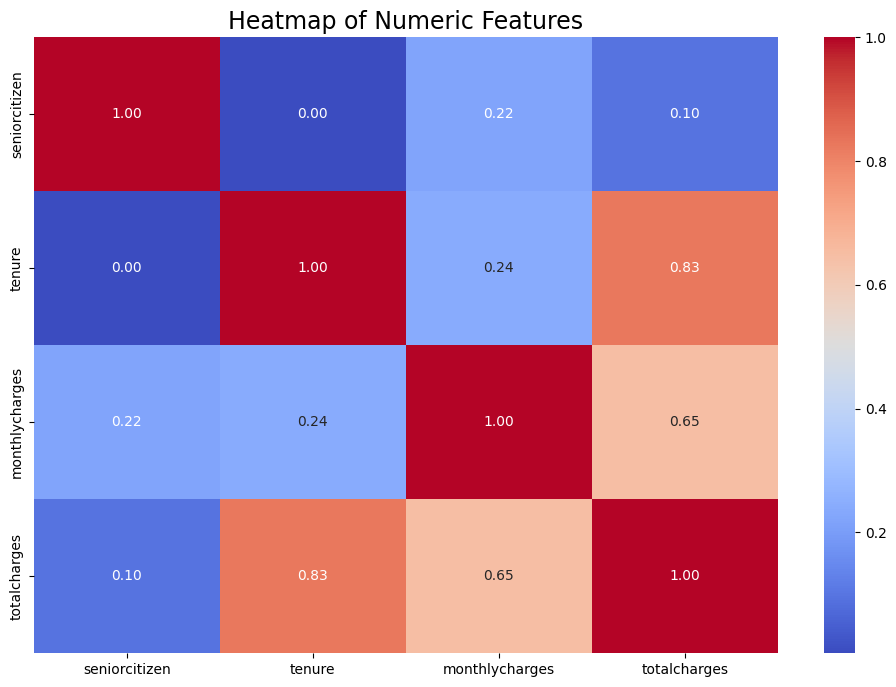

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='0.2f', cmap='coolwarm')
plt.title('Heatmap of Numeric Features', fontsize=17)
plt.show()


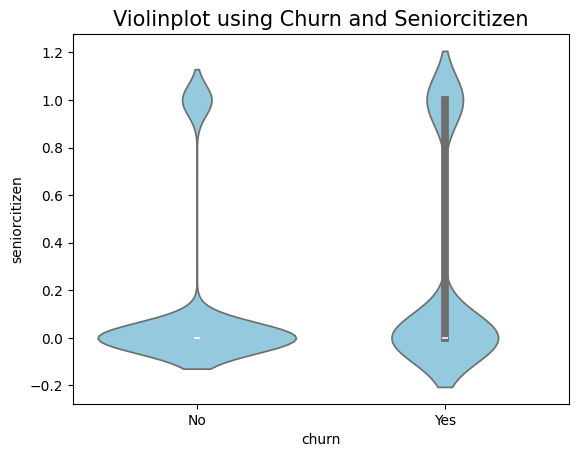

In [36]:
sns.violinplot(data=Customer_churn, x='churn', y='seniorcitizen', color='skyblue')
plt.title( 'Violinplot using Churn and Seniorcitizen', fontsize=15)
plt.show()

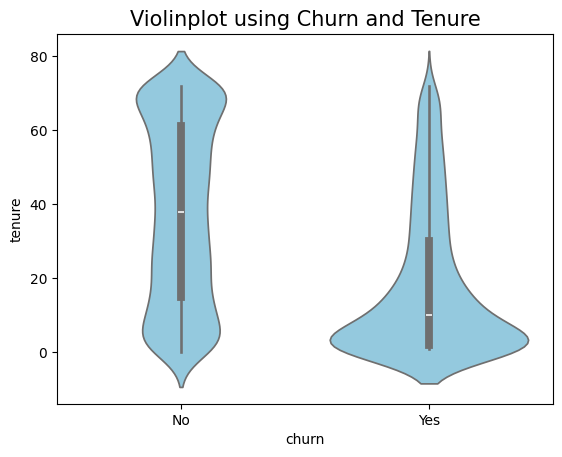

In [37]:
sns.violinplot(data=Customer_churn, x='churn', y='tenure', color='skyblue')
plt.title( 'Violinplot using Churn and Tenure', fontsize=15)
plt.show()

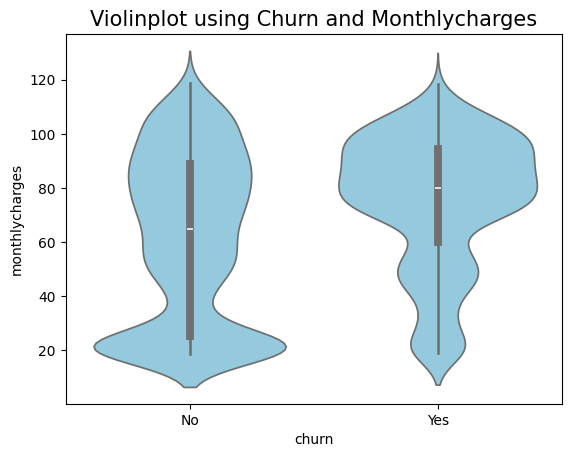

In [38]:
sns.violinplot(data=Customer_churn, x='churn', y='monthlycharges', color='skyblue')
plt.title( 'Violinplot using Churn and Monthlycharges', fontsize=15)
plt.show()

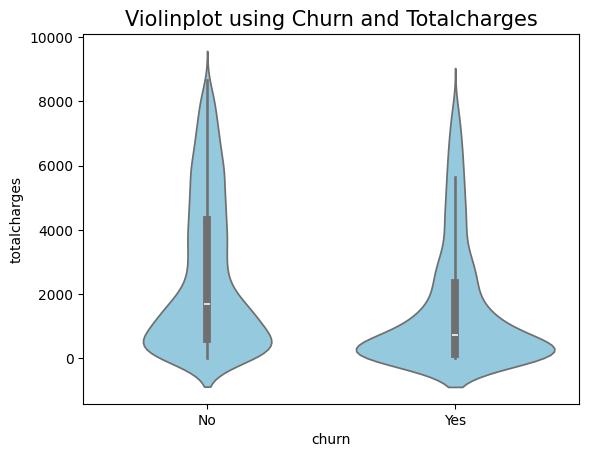

In [39]:
sns.violinplot(data=Customer_churn, x='churn', y='totalcharges', color='skyblue')
plt.title( 'Violinplot using Churn and Totalcharges', fontsize=15)
plt.show()

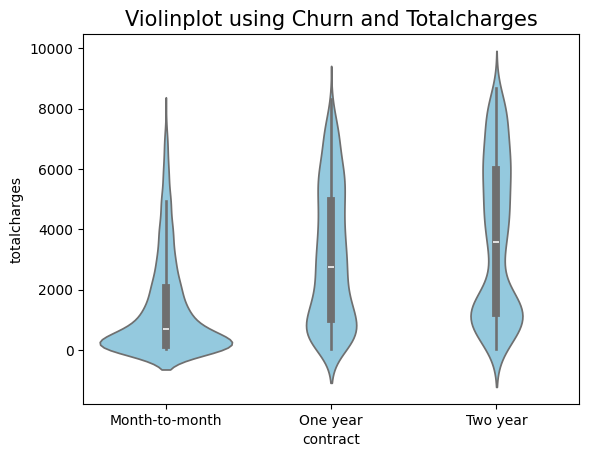

In [40]:
sns.violinplot(data=Customer_churn, x='contract', y='totalcharges', color='skyblue')
plt.title( 'Violinplot using Churn and Totalcharges', fontsize=15)
plt.show()

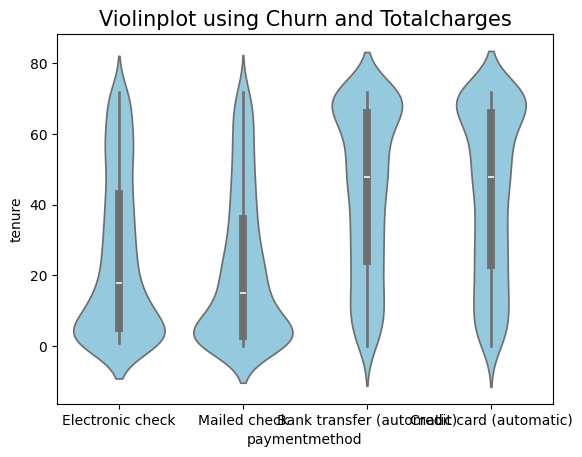

In [41]:
sns.violinplot(data=Customer_churn, x='paymentmethod', y='tenure', color='skyblue')
plt.title( 'Violinplot using Churn and Totalcharges', fontsize=15)
plt.show()

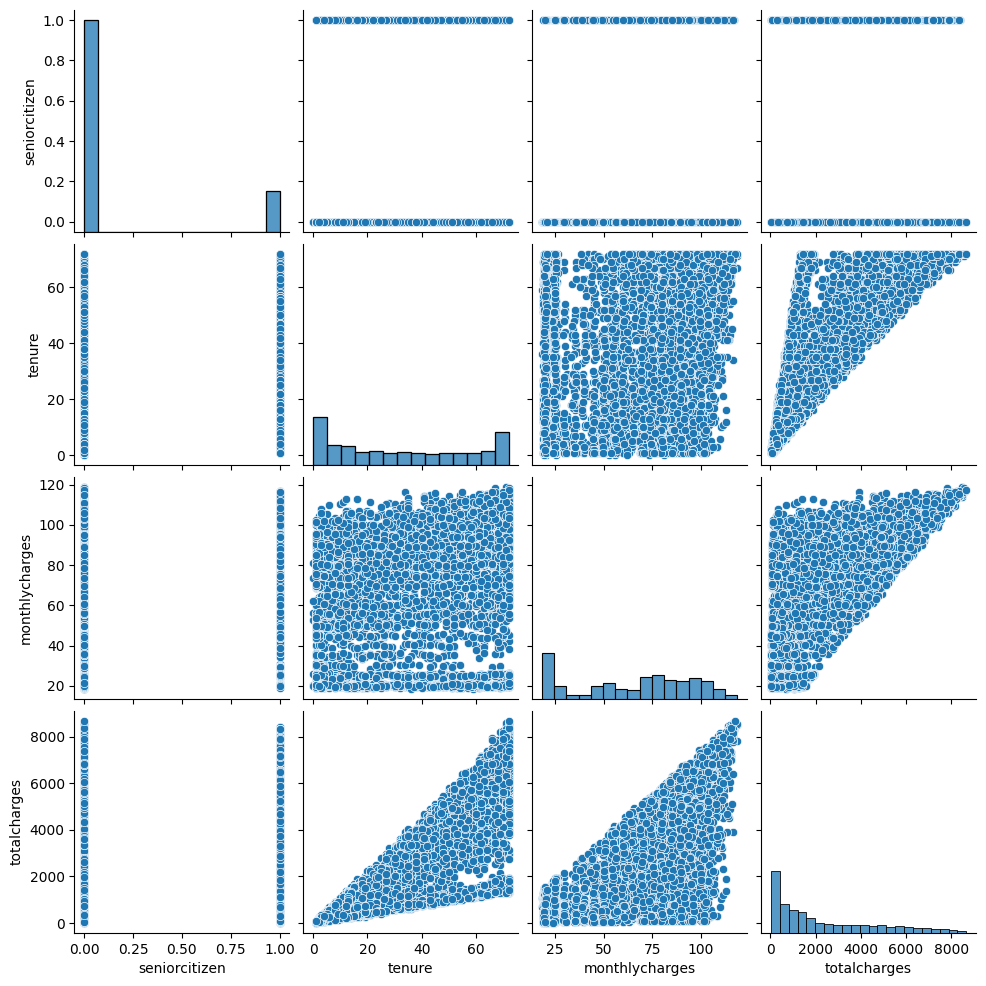

In [42]:
# Pair plot for all numerical columns in the dataframe
sns.pairplot(Customer_churn)


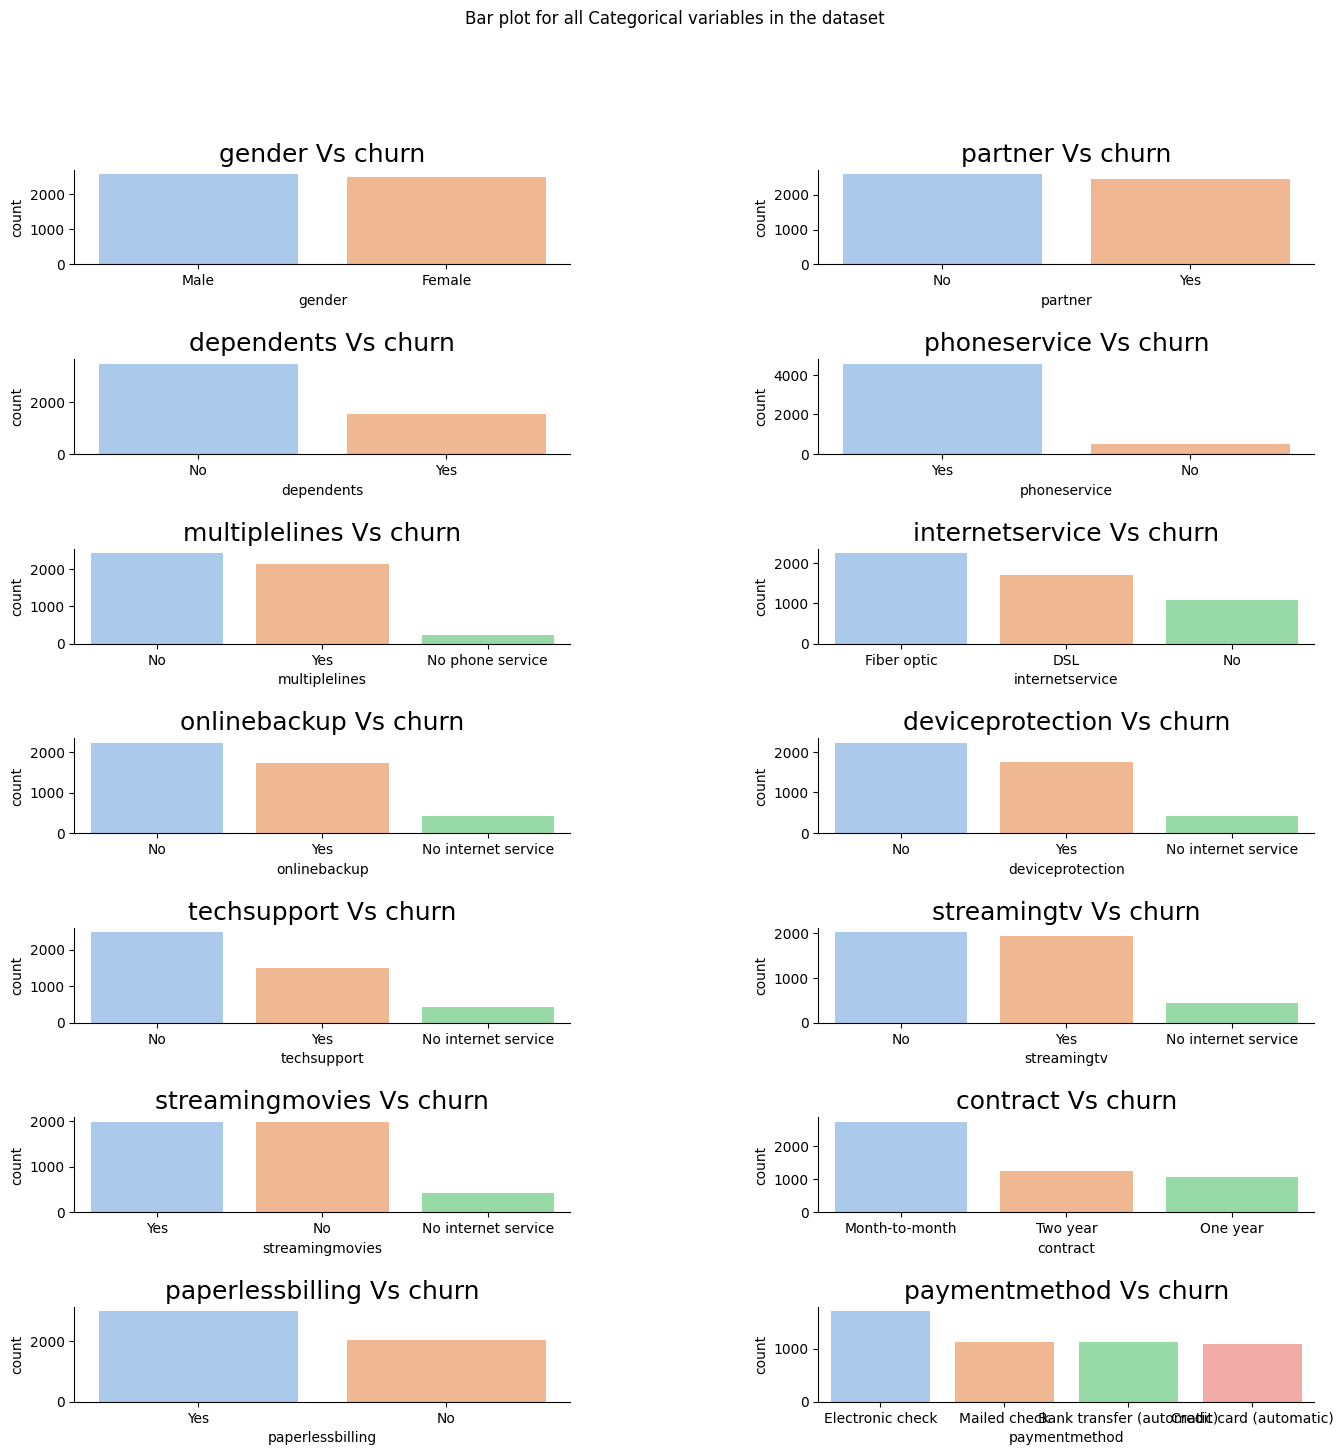

In [43]:
# Creating a 7x2 grid of subplots with a size of 12x18
fig, axarr = plt.subplots(7, 2, figsize=(16, 16))

# Define a custom color palette (replace with your desired colors)
palette = sns.color_palette("pastel") 

# Setting the title for the plots
fig.suptitle('Bar plot for all Categorical variables in the dataset')

# Plotting 'Gender' countplot
sns.countplot(ax = axarr[0, 0], x = 'gender', data = Customer_churn, palette = palette, 
              order = Customer_churn['gender'].value_counts().index)
axarr[0, 0].set_title("gender Vs churn", fontsize=18)

# Plotting 'SeniorCitizen' countplot
sns.countplot(ax = axarr[0, 1], x = 'partner', data = Customer_churn, palette = palette, 
              order = Customer_churn['partner'].value_counts().index)
axarr[0, 1].set_title("partner Vs churn", fontsize=18)

# Plotting 'Dependents' countplot
sns.countplot(ax = axarr[1, 0], x = 'dependents', data = Customer_churn, palette = palette, 
              order = Customer_churn['dependents'].value_counts().index)
axarr[1, 0].set_title("dependents Vs churn", fontsize=18)

# Plotting 'PhoneService' countplot
sns.countplot(ax = axarr[1, 1], x = 'phoneservice', data = Customer_churn, palette = palette, 
              order = Customer_churn['phoneservice'].value_counts().index)
axarr[1, 1].set_title("phoneservice Vs churn", fontsize=18)

# Plotting 'MultipleLines' countplot
sns.countplot(ax = axarr[2, 0], x = 'multiplelines', data = Customer_churn, palette = palette, 
              order = Customer_churn['multiplelines'].value_counts().index)
axarr[2, 0].set_title("multiplelines Vs churn", fontsize=18)

# Plotting 'InternetService' countplot
sns.countplot(ax = axarr[2, 1], x = 'internetservice', data = Customer_churn, palette = palette, 
              order = Customer_churn['internetservice'].value_counts().index)
axarr[2, 1].set_title("internetservice Vs churn", fontsize=18)

# Plotting 'OnlineBackup' countplot
sns.countplot(ax = axarr[3, 0], x = 'onlinebackup', data = Customer_churn, palette = palette, 
              order = Customer_churn['onlinebackup'].value_counts().index)
axarr[3, 0].set_title("onlinebackup Vs churn", fontsize=18)

# Plotting 'DeviceProtection' countplot
sns.countplot(ax = axarr[3, 1], x = 'deviceprotection', data = Customer_churn, palette = palette, 
              order = Customer_churn['deviceprotection'].value_counts().index)
axarr[3, 1].set_title("deviceprotection Vs churn", fontsize=18)

# Plotting 'TechSupport' countplot
sns.countplot(ax = axarr[4, 0], x = 'techsupport', data = Customer_churn, palette = palette, 
              order = Customer_churn['techsupport'].value_counts().index)
axarr[4, 0].set_title("techsupport Vs churn", fontsize=18)

# Plotting 'StreamingTV' countplot
sns.countplot(ax = axarr[4, 1], x = 'streamingtv', data = Customer_churn, palette = palette, 
              order = Customer_churn['streamingtv'].value_counts().index)
axarr[4, 1].set_title("streamingtv Vs churn", fontsize=18)

# Plotting 'StreamingMovies' countplot
sns.countplot(ax = axarr[5, 0], x = 'streamingmovies', data = Customer_churn, palette = palette, 
              order = Customer_churn['streamingmovies'].value_counts().index)
axarr[5, 0].set_title("streamingmovies Vs churn", fontsize=18)

# Plotting 'Contract' countplot
sns.countplot(ax = axarr[5, 1], x = 'contract', data = Customer_churn, palette = palette, 
              order = Customer_churn['contract'].value_counts().index)
axarr[5, 1].set_title("contract Vs churn", fontsize=18)

# Plotting 'PaperlessBilling' countplot
sns.countplot(ax = axarr[6, 0], x = 'paperlessbilling', data = Customer_churn, palette = palette, 
              order = Customer_churn['paperlessbilling'].value_counts().index)
axarr[6, 0].set_title("paperlessbilling Vs churn", fontsize=18)

# Plotting 'PaymentMethod' countplot
sns.countplot(ax = axarr[6, 1], x = 'paymentmethod', data = Customer_churn, palette = palette, 
              order = Customer_churn['paymentmethod'].value_counts().index)
axarr[6, 1].set_title("paymentmethod Vs churn", fontsize=18)

# Adjusting the layout to prevent overlapping of subplots
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)

# Removing the top and right spines from plot for aesthetic purposes
sns.despine()

# Displaying the plots
plt.show()


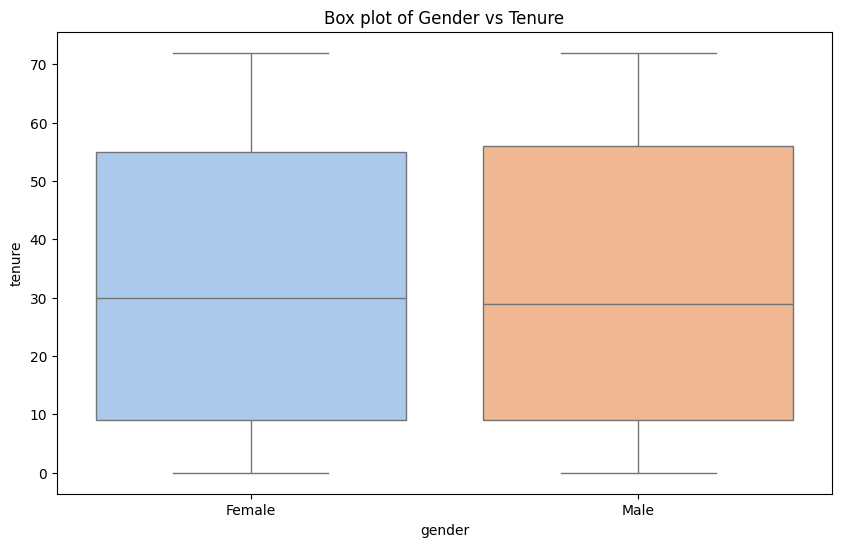

In [44]:
# Categorical vs Numerical data
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='tenure', data=Customer_churn, palette=palette)
plt.title('Box plot of Gender vs Tenure')
plt.show()


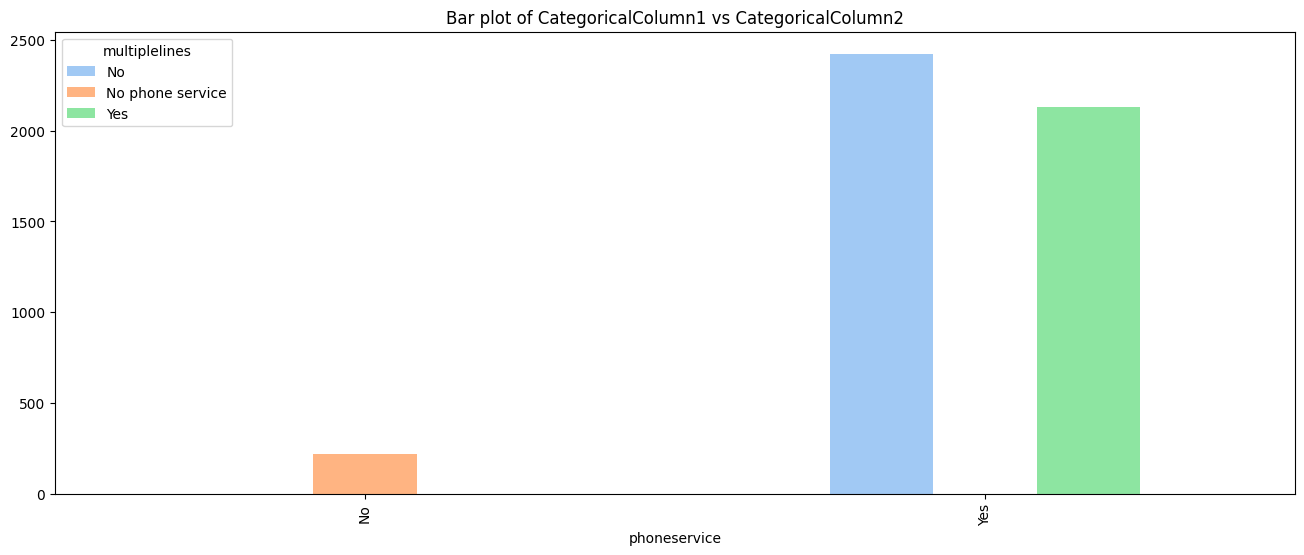

In [45]:
# Categorical vs Categorical data
cross_tab = pd.crosstab(Customer_churn['phoneservice'], Customer_churn['multiplelines'])

# Define the color palette
colors = sns.color_palette("pastel")

cross_tab.plot(kind='bar', color=colors, figsize=(16, 6))
plt.title('Bar plot of CategoricalColumn1 vs CategoricalColumn2')
plt.show()


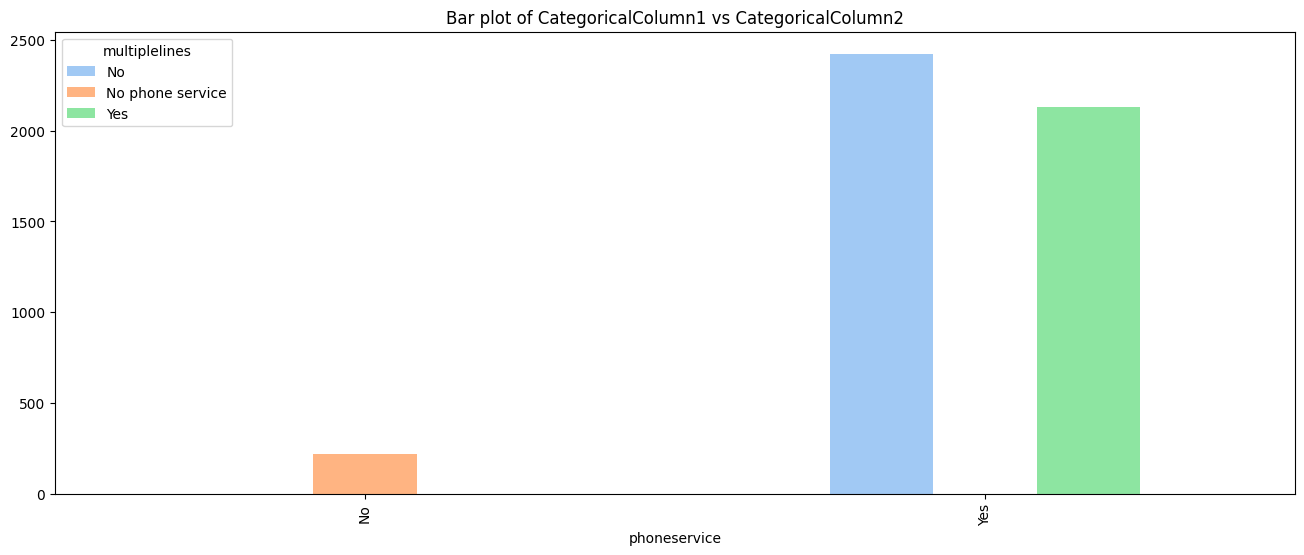

In [46]:
# Categorical vs Categorical data
cross_tab = pd.crosstab(Customer_churn['phoneservice'], Customer_churn['multiplelines'])
cross_tab.plot(kind='bar', stacked=False, figsize=(16, 6), color=palette)
plt.title('Bar plot of CategoricalColumn1 vs CategoricalColumn2')
plt.show()


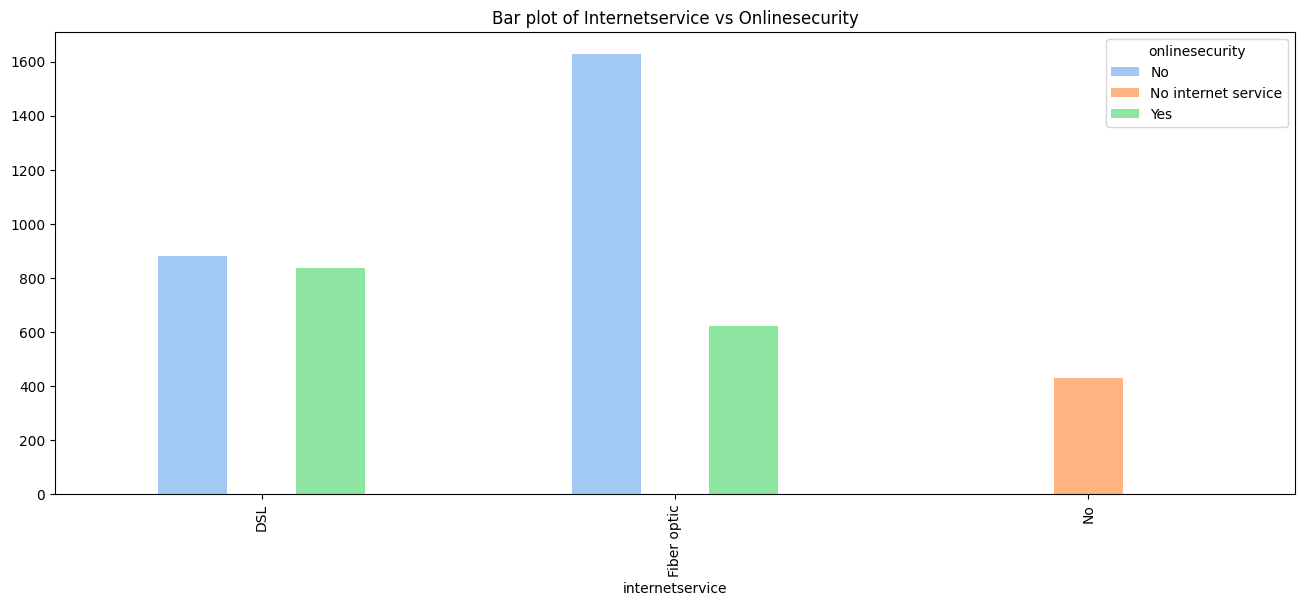

In [47]:
# Categorical vs Categorical data
cross_tab = pd.crosstab(Customer_churn['internetservice'], Customer_churn['onlinesecurity'])
cross_tab.plot(kind='bar', stacked=False, figsize=(16, 6), color=palette)
plt.title('Bar plot of Internetservice vs Onlinesecurity')
plt.show()

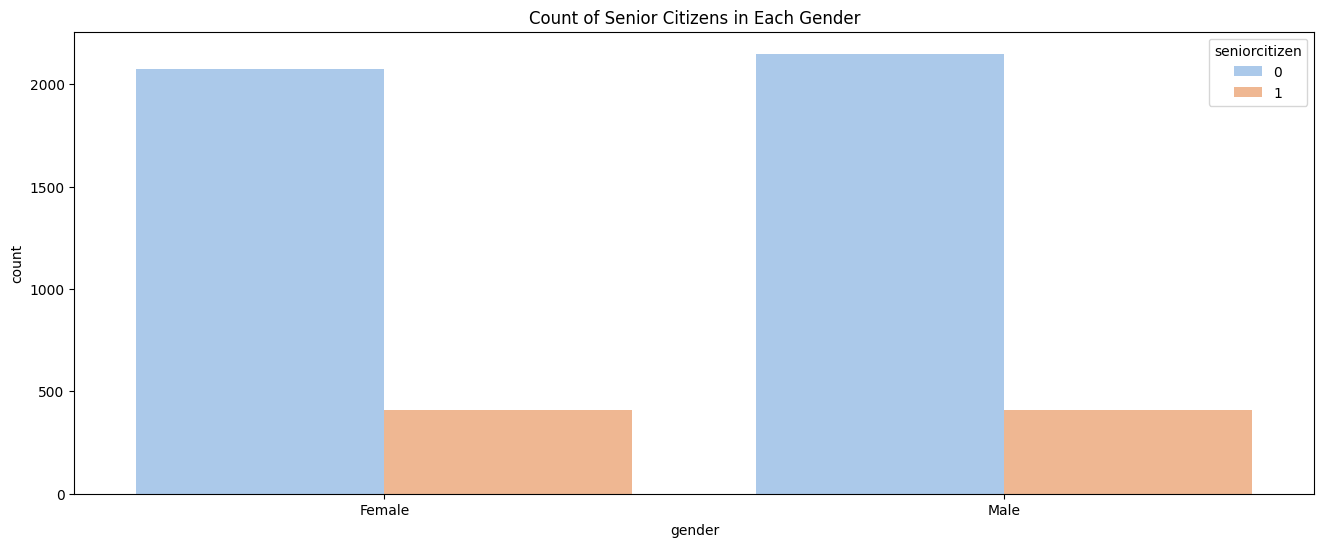

In [48]:
plt.figure(figsize=(16, 6))

# Categorical vs Categorical data
cross_tab = pd.crosstab(Customer_churn['phoneservice'], Customer_churn['multiplelines'])

# Use the palette in your countplot
sns.countplot(x='gender', hue='seniorcitizen', data=Customer_churn, palette=palette)

plt.title('Count of Senior Citizens in Each Gender')
plt.show()

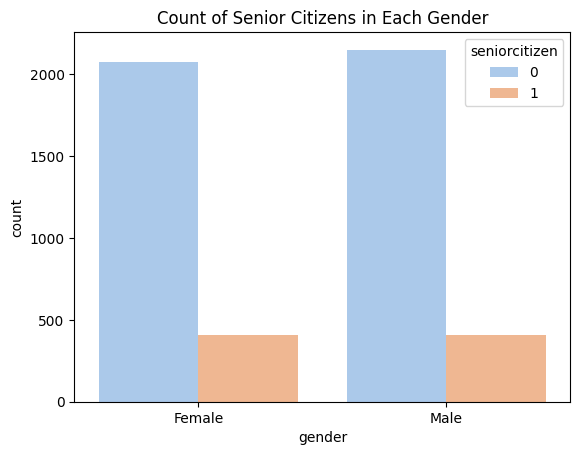

In [49]:

# Categorical vs Categorical data
cross_tab = pd.crosstab(Customer_churn['phoneservice'], Customer_churn['multiplelines'])

# Use the palette in your countplot
sns.countplot(x='gender', hue='seniorcitizen', data=Customer_churn, palette=palette)

plt.title('Count of Senior Citizens in Each Gender')
plt.show()


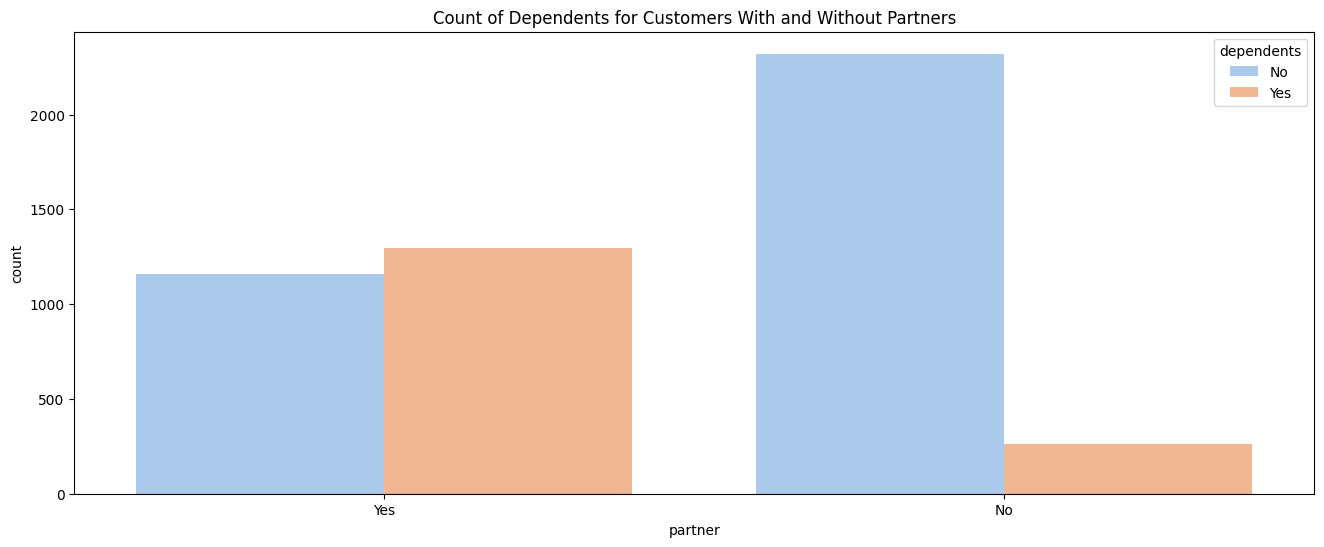

In [50]:
plt.figure(figsize=(16, 6))
sns.countplot(x='partner', hue='dependents', data=Customer_churn, palette=palette)
plt.title('Count of Dependents for Customers With and Without Partners')
plt.show()


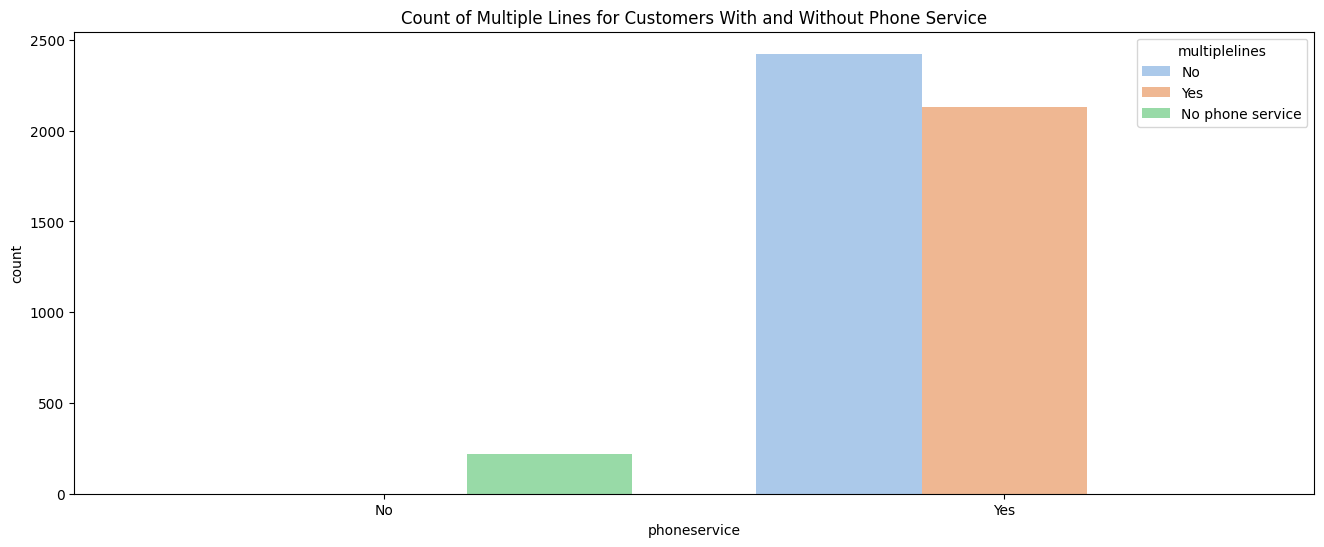

In [51]:
plt.figure(figsize=(16, 6))
sns.countplot(x='phoneservice', hue='multiplelines', data=Customer_churn, palette=palette)
plt.title('Count of Multiple Lines for Customers With and Without Phone Service')
plt.show()


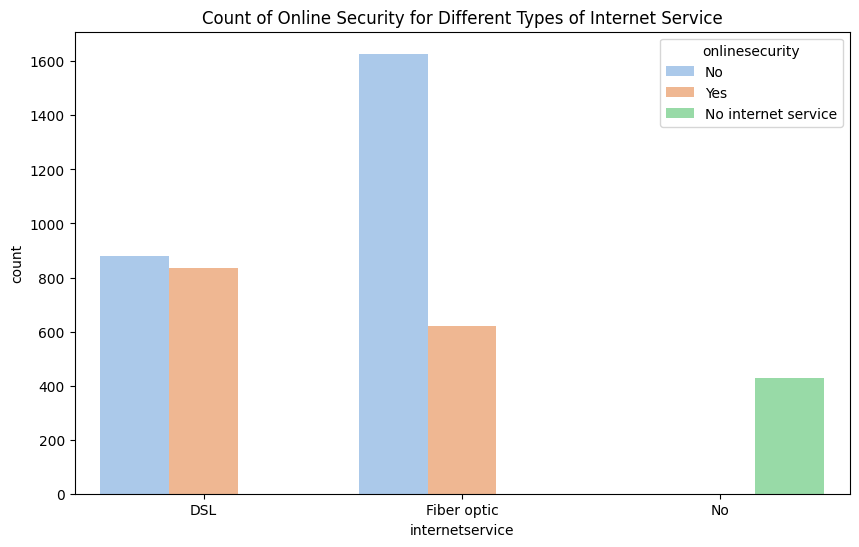

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='internetservice', hue='onlinesecurity', data=Customer_churn, palette=palette)
plt.title('Count of Online Security for Different Types of Internet Service')
plt.show()


### Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

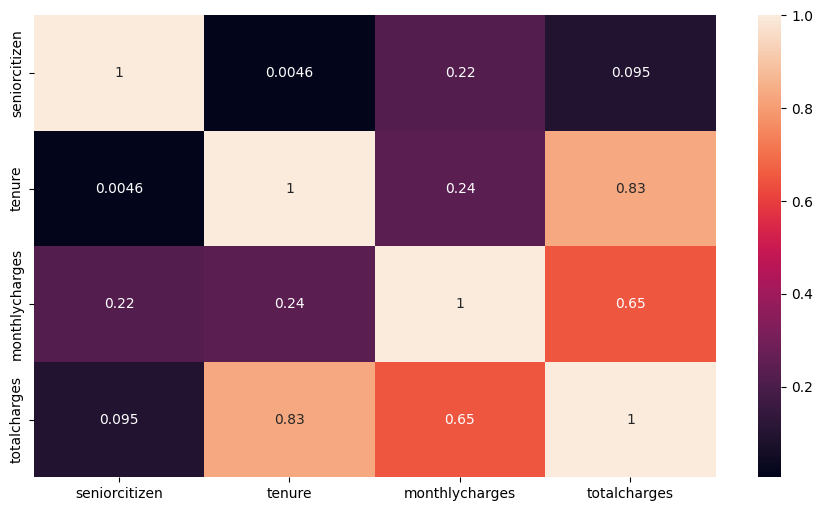

In [53]:
# Select only numeric columns
numeric_df = Customer_churn.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_df.corr()
correlation

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
# This line of code creates a heatmap using seaborn (sns) of the 'correlation' matrix. 
sns.heatmap(correlation, annot=True)

plt.show

#### Observation
- Fron the histogram, the skewness values of 1.83, 0.23 and 0.94 suggests that seniorcitizen, tenure, and totalcharges significantly skewed to the right. While the monthlycharges is slight left skewed with a value of -0.24.

- The boxplot for seniorcitizen suggest that, the data is heavily concentrated around one value zero(0). There’s an outlier marked as a circle near value ‘1’ on the x-axis.

- The plots suggest that there are significantly more non-senior citizens (0) than senior citizens (1) in this dataset. This could potentially impact any predictive models that use this data, as they may be biased towards predicting non-senior citizens due to the imbalance in the data.

- From the plot we notice that tenure and totalcharges have the a high correlation with churn.

#### Observations

1 - The dataset is not evenly distributed because the mean, median and the mode are not the same

2 - The dataset is positive skewed.

3 - There features are not on the same scale and this is even more profound looking at the `MonthlyCharges` Feature

4 - There is a siginificant rise in `monthlycharges` and `totalcgharges` with the increase in `tenure` of a customer.

### HYPOTHESIS TESTING



`Null Hypothesis (H0):` Longer tenure does not impact the likelihood of customer churn.

`Alternative Hypothesis (H1):`There is a correlation between longer tenure and the likelihood of customer churn.


In [54]:
from scipy.stats import pearsonr

# Assuming 'df' is your DataFrame, 'tenure' is the tenure column, and 'Churn' is the churn column
# Convert the 'Churn' column to numerical values
Customer_churn['Churn_numerical'] = Customer_churn['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate Pearson's correlation
corr, p_value = pearsonr(Customer_churn['tenure'], Customer_churn['Churn_numerical'])

print("Pearson’s correlation coefficient: %.3f" % corr)
print("p-value: %.3f" % p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis >> There is a correlation between longer tenure and the likelihood of customer churn.")
else:
    print("Fail to reject null hypothesis >> Longer tenure does not impact the likelihood of customer churn.")


Pearson’s correlation coefficient: -0.351
p-value: 0.000
Reject null hypothesis >> There is a correlation between longer tenure and the likelihood of customer churn.


In [55]:
# Checking Normality of the data

def check_normality(data,name):
    test_stat_nonality, p_value_normality=stats.shapiro(data)
    print("p value:%.20f" % p_value_normality)
    if p_value_normality <0.85:
        print(f"Reject null hypothesis >> The data for {name} is not normally distributed")
    else:
        print(f"Fail to reject null hypothesis >> The data for {name} is normally distributed")

In [56]:
import pandas as pd
from scipy.stats import shapiro


# Separate tenure data for churned and not churned customers
tenure_churned = Customer_churn[Customer_churn['churn'] == 'Yes']['tenure']
tenure_not_churned = Customer_churn[Customer_churn['churn'] == 'No']['tenure']

# Perform the Shapiro-Wilk test for normality
stat_churned, p_churned = shapiro(tenure_churned)
stat_not_churned, p_not_churned = shapiro(tenure_not_churned)

print('Churned: Statistics=%.3f, p=%.3f' % (stat_churned, p_churned))
print('Not Churned: Statistics=%.3f, p=%.3f' % (stat_not_churned, p_not_churned))

# Interpret
alpha = 0.05
if p_churned > alpha:
    print('Tenure for churned customers looks Gaussian (fail to reject H0)')
else:
    print('Tenure for churned customers does not look Gaussian (reject H0)')

if p_not_churned > alpha:
    print('Tenure for not churned customers looks Gaussian (fail to reject H0)')
else:
    print('Tenure for not churned customers does not look Gaussian (reject H0)')


Churned: Statistics=0.821, p=0.000
Not Churned: Statistics=0.919, p=0.000
Tenure for churned customers does not look Gaussian (reject H0)
Tenure for not churned customers does not look Gaussian (reject H0)


In [57]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'df' is your DataFrame and it has columns 'Churn' and 'tenure'
group1 = Customer_churn[Customer_churn['churn'] == 'Yes']['tenure']
group2 = Customer_churn[Customer_churn['churn'] == 'No']['tenure']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=1292899.000, p=0.000


In [58]:
from scipy.stats import chi2_contingency

# Create a contingency table of contract type and churn
cont_table = pd.crosstab(Customer_churn['tenure'], Customer_churn['churn'])

# Conduct the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(cont_table)

# Print the test results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:\n", expected)

# # Visualize the contingency table as a heatmap
# sns.heatmap(cont_table, annot=True, cmap='YlGnBu')

# # Add labels and title
# plt.xlabel('Churn')
# plt.ylabel('Contract Type')
# plt.title('Contingency Table: Contract Type vs. Churn')

# # Display the plot
# plt.show()

Chi-Squared: 774.1801118993867
P-Value: 3.084245822214292e-118
Degrees of Freedom: 72


`Null Hypothesis (H0):` There is no significant correlation between contract type and customer churn.

`Alternative Hypothesis (H0):` There is a significant correlation between contract type and customer churn.


Chi-Squared: 881.6208905118242
P-Value: 3.61789584641233e-192
Degrees of Freedom: 2
Expected Frequencies:
 [[2016.9107497   727.0892503 ]
 [ 775.45220151  279.54779849]
 [ 913.63704879  329.36295121]]


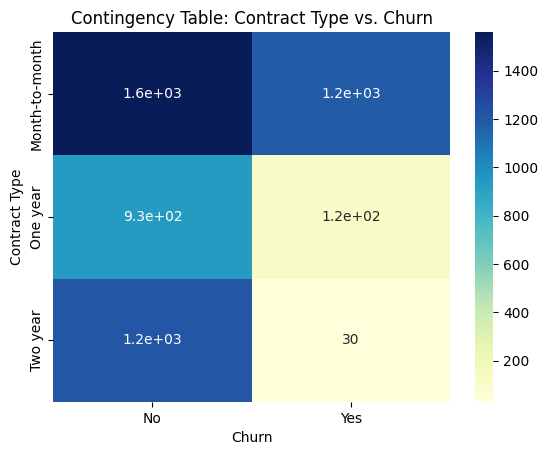

In [59]:
from scipy.stats import chi2_contingency

# Create a contingency table of contract type and churn
cont_table = pd.crosstab(Customer_churn['contract'], Customer_churn['churn'])

# Conduct the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(cont_table)

# Print the test results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Visualize the contingency table as a heatmap
sns.heatmap(cont_table, annot=True, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Contract Type')
plt.title('Contingency Table: Contract Type vs. Churn')

# Display the plot
plt.show()

### Answering Analytical Questions

Question 1: What is the proportion of customers who churn compared to those who remain?

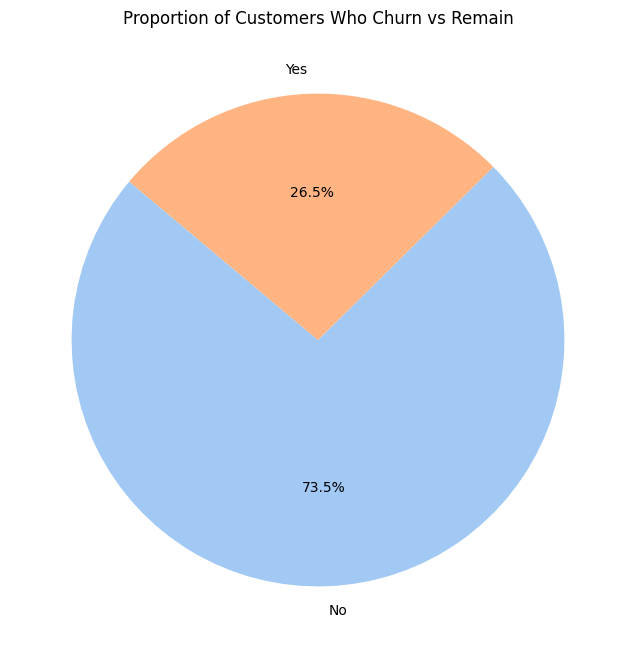

In [60]:
# Calculate the counts of churned and remained customers
churn_counts = Customer_churn['churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proportion of Customers Who Churn vs Remain')
plt.show()


Question 2: Which gender has a higher churn rate?

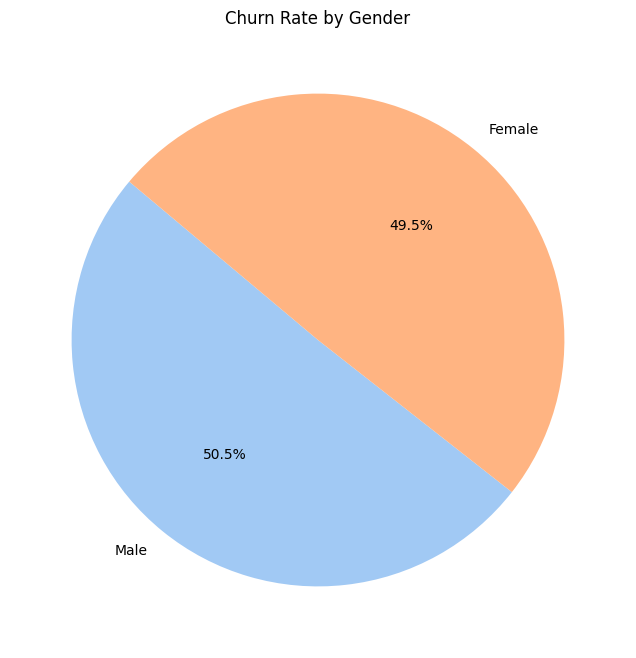

In [61]:
import seaborn as sns

# Assuming 'df' is your DataFrame and it has columns 'Gender' and 'Churn'
churn_by_gender = Customer_churn[Customer_churn['churn'] == 'Yes']['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_by_gender, labels=churn_by_gender.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))  # Using Seaborn's pastel color palette
plt.title('Churn Rate by Gender')
plt.show()


Question 3: What is the distribution of customers based on their senior citizen status?

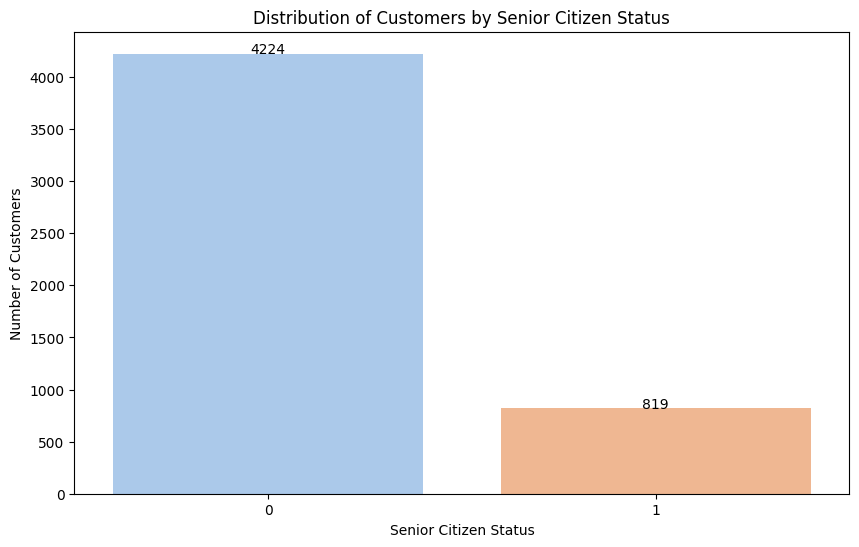

In [62]:
# Assuming 'df' is your DataFrame and it has a column 'SeniorCitizen'
senior_citizen_distribution = Customer_churn['seniorcitizen'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=senior_citizen_distribution.index, y=senior_citizen_distribution.values, palette="pastel")

# Add the values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')

plt.title('Distribution of Customers by Senior Citizen Status')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Number of Customers')
plt.show()

Question 4: Is there a difference in churn rate between senior citizens and non-senior citizens?

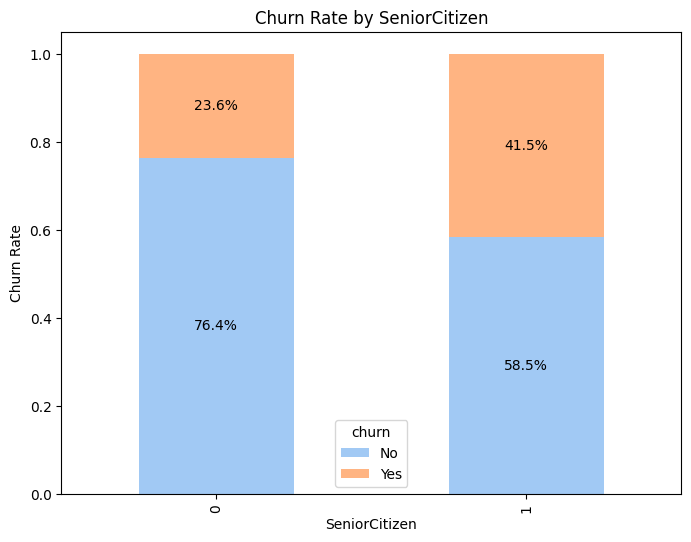

In [63]:
# Assuming 'df' is your DataFrame and it has columns 'SeniorCitizen' and 'Churn'
churn_by_senior = Customer_churn.groupby(['seniorcitizen', 'churn']).size().unstack()

# Calculate the rates
churn_rates = churn_by_senior.div(churn_by_senior.sum(axis=1), axis=0)

# Create a stacked bar plot with pastel colors
ax = churn_rates.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette("pastel"))
plt.title('Churn Rate by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn Rate')

# Add the rates on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1%}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()


Question 5: What are the most popular internet services among customers?


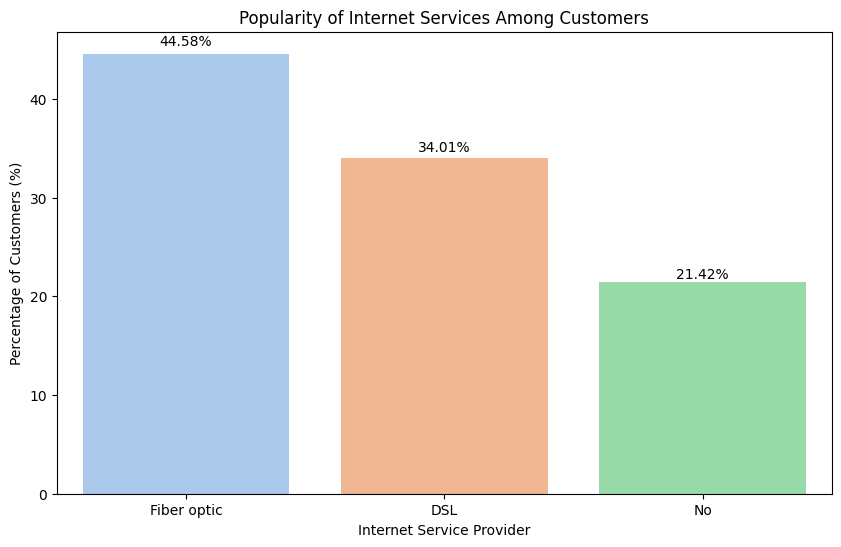

In [64]:

# Assuming 'df' is your DataFrame and it has a column 'InternetService'
isp_distribution = Customer_churn['internetservice'].value_counts()

# Calculate the percentage
isp_percentage = (isp_distribution / isp_distribution.sum()) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=isp_percentage.index, y=isp_percentage.values, palette="pastel")

# Add the rates on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.title('Popularity of Internet Services Among Customers')
plt.xlabel('Internet Service Provider')
plt.ylabel('Percentage of Customers (%)')
plt.show()


Question 6: How does the churn rate vary by internet service provider?

<Figure size 1000x600 with 0 Axes>

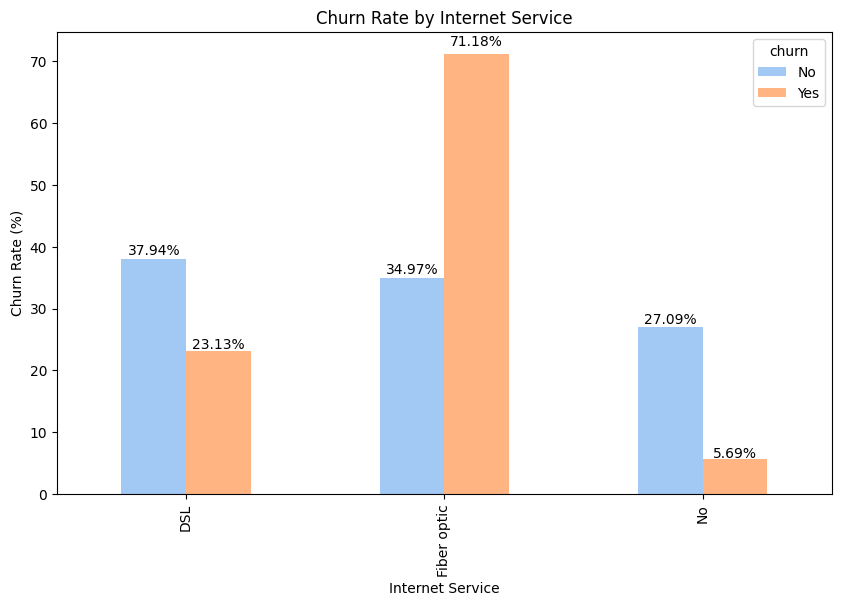

In [65]:

# Assuming 'df' is your DataFrame and it has columns 'Churn' and 'InternetService'
churn_by_isp = Customer_churn.groupby(['internetservice', 'churn']).size().unstack()

# Calculate the percentage
churn_percentage = (churn_by_isp / churn_by_isp.sum()) * 100

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
ax = churn_percentage.plot(kind='bar', stacked=False, color=sns.color_palette("pastel"), figsize=(10,6))

# Add the rates on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate (%)')
plt.show()

Question 7: How many customers have tech support?

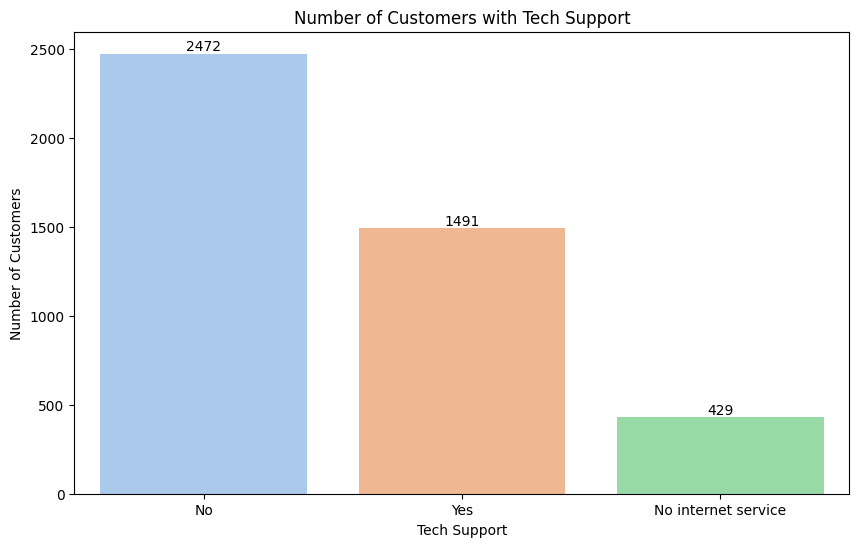

In [66]:
# Calculate the counts of customers with tech support
tech_support_counts = Customer_churn['techsupport'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=tech_support_counts.index, y=tech_support_counts.values, palette="pastel")

# Add counts on top of the bars
for i, value in enumerate(tech_support_counts.values):
    bar_plot.text(i, value, value, ha='center', va='bottom')

plt.title('Number of Customers with Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.show()


Question 8: How many customers have streaming TV or streaming movie services?

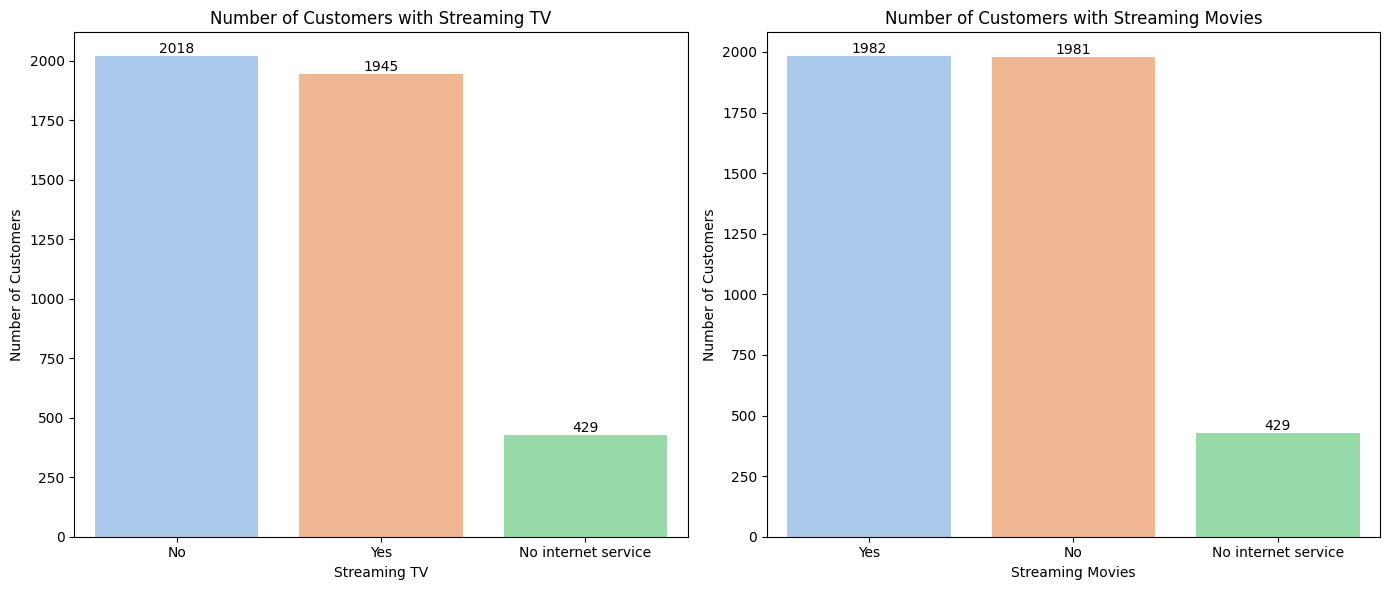

In [67]:
# Calculate the counts of customers with streaming TV and streaming movie services
streaming_tv_counts = Customer_churn['streamingtv'].value_counts()
streaming_movie_counts = Customer_churn['streamingmovies'].value_counts()

# Create a subplot for each service
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for 'StreamingTV'
bar_plot_tv = sns.barplot(x=streaming_tv_counts.index, y=streaming_tv_counts.values, ax=axs[0], palette="pastel")
axs[0].set_title('Number of Customers with Streaming TV')
axs[0].set_xlabel('Streaming TV')
axs[0].set_ylabel('Number of Customers')

# Add counts on top of the bars for 'StreamingTV'
for i, value in enumerate(streaming_tv_counts.values):
    bar_plot_tv.text(i, value, value, ha='center', va='bottom')

# Bar plot for 'StreamingMovies'
bar_plot_movies = sns.barplot(x=streaming_movie_counts.index, y=streaming_movie_counts.values, ax=axs[1], palette="pastel")
axs[1].set_title('Number of Customers with Streaming Movies')
axs[1].set_xlabel('Streaming Movies')
axs[1].set_ylabel('Number of Customers')

# Add counts on top of the bars for 'StreamingMovies'
for i, value in enumerate(streaming_movie_counts.values):
    bar_plot_movies.text(i, value, value, ha='center', va='bottom')

plt.tight_layout()
plt.show()


Question 8: What are the most common payment methods?

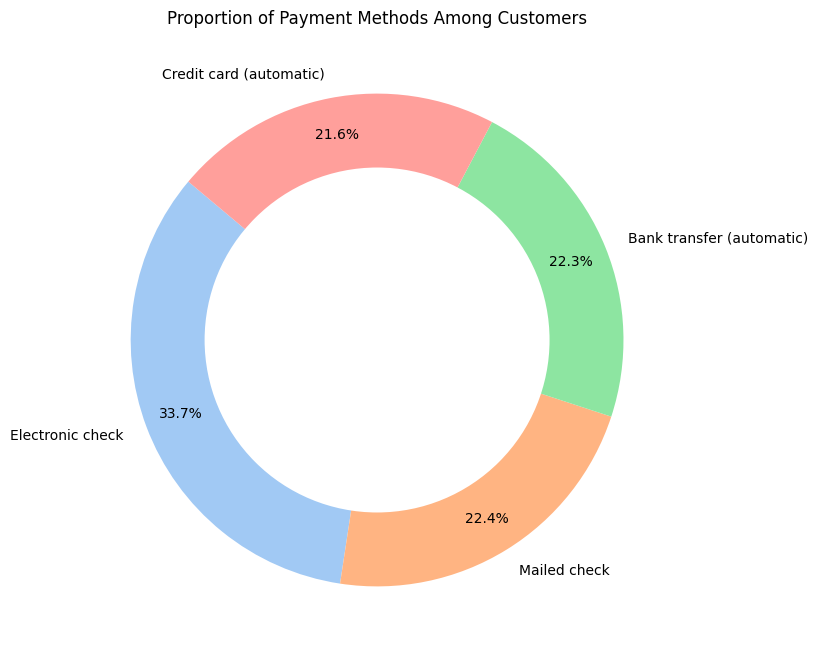

In [68]:
# Calculate the counts of each payment method
payment_method_counts = Customer_churn['paymentmethod'].value_counts()

# Create a donut chart
plt.figure(figsize=(16, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Proportion of Payment Methods Among Customers')
plt.show()


Question 9: Is there a difference in churn rate based on payment method?

<Figure size 1000x600 with 0 Axes>

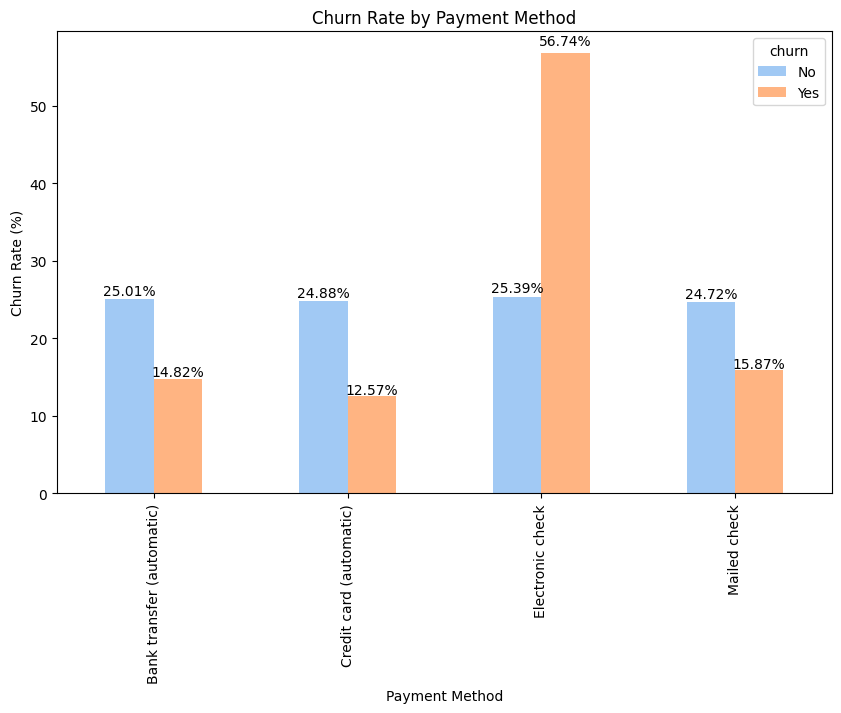

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'Churn' and 'PaymentMethod'
churn_by_payment = Customer_churn.groupby(['paymentmethod', 'churn']).size().unstack()

# Calculate the percentage
churn_percentage = (churn_by_payment / churn_by_payment.sum()) * 100

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
ax = churn_percentage.plot(kind='bar', stacked=False, color=sns.color_palette("pastel"), figsize=(10,6))

# Add the rates on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.show()


Question 10: What types of contracts are most common among customers?

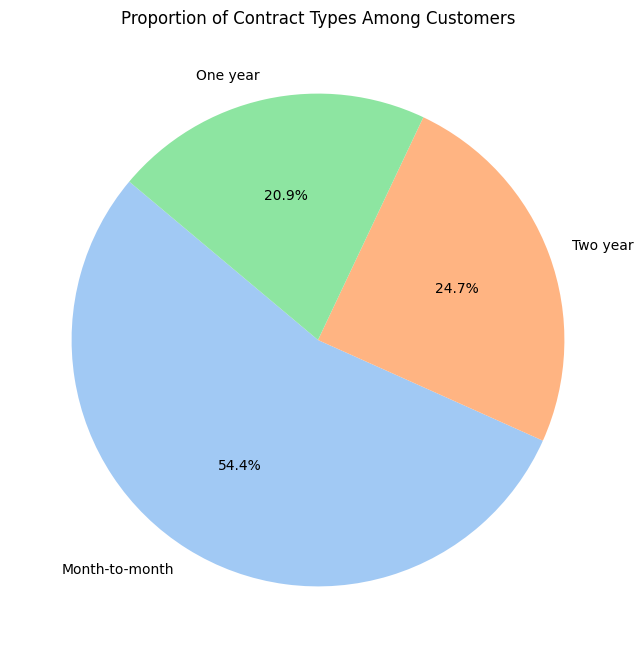

In [70]:
# Calculate the counts of each contract type
contract_type_counts = Customer_churn['contract'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(contract_type_counts, labels=contract_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proportion of Contract Types Among Customers')
plt.show()


Question 11: What is the churn rate by contract type?

<Figure size 1000x600 with 0 Axes>

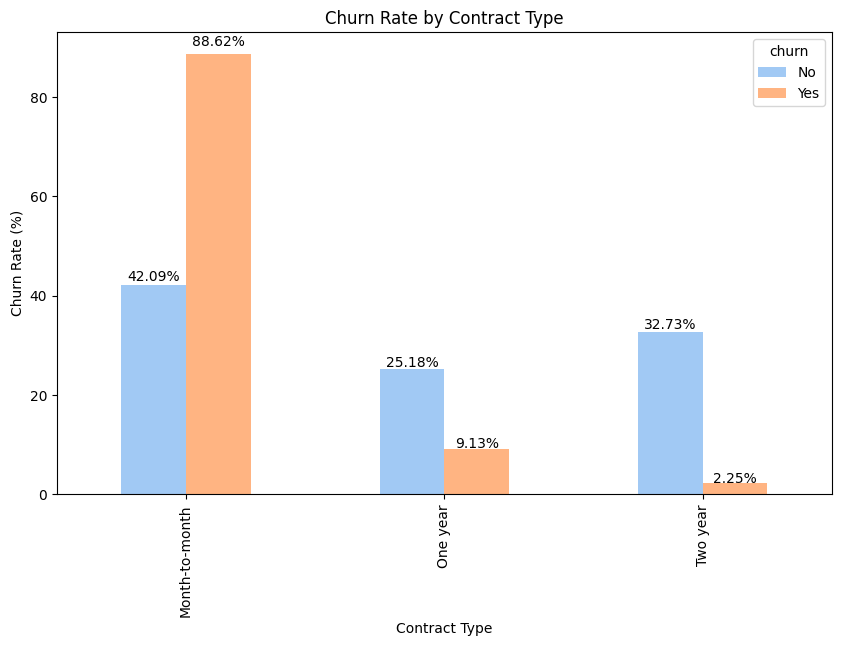

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'Churn' and 'Contract'
churn_by_contract = Customer_churn.groupby(['contract', 'churn']).size().unstack()

# Calculate the percentage
churn_percentage = (churn_by_contract / churn_by_contract.sum()) * 100

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
ax = churn_percentage.plot(kind='bar', stacked=False, color=sns.color_palette("pastel"), figsize=(10,6))

# Add the rates on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()


Question 12: What is the distribution of customers based on their tech support status?

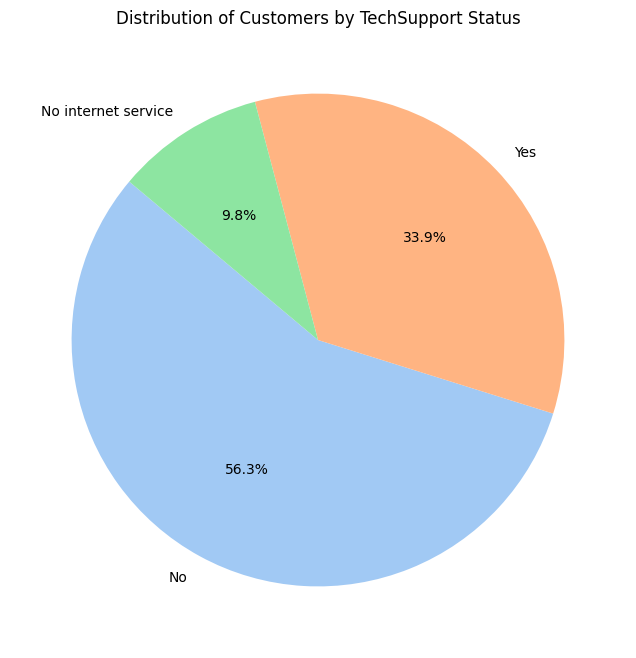

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column 'TechSupport'
tech_support_distribution = Customer_churn['techsupport'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tech_support_distribution, labels=tech_support_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Customers by TechSupport Status')
plt.show()


Question 13: What is the proportion of Contract Types Among Customers?


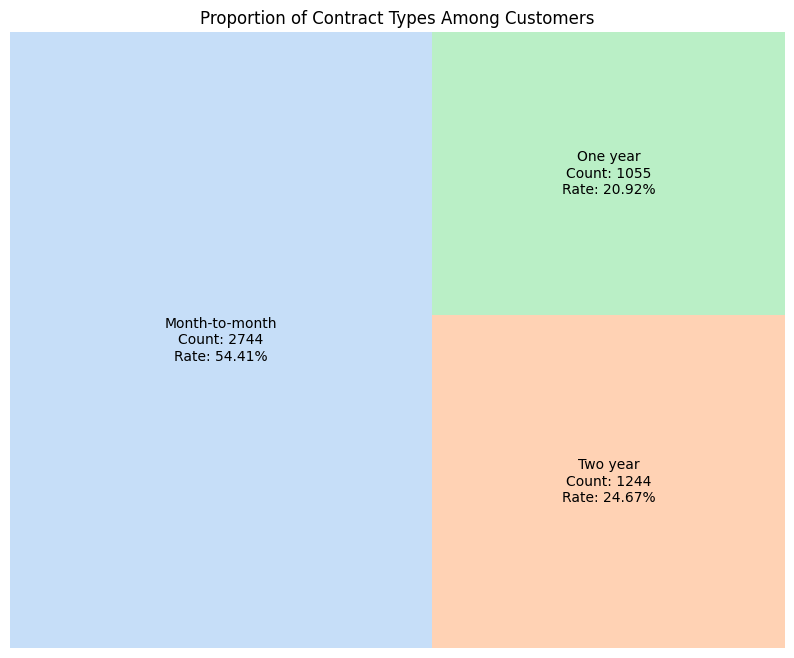

In [73]:
import squarify

# Calculate the counts of each contract type
contract_type_counts = Customer_churn['contract'].value_counts()

# Calculate the rates of each contract type
contract_type_rates = contract_type_counts / contract_type_counts.sum() * 100

# Create labels for each rectangle in the treemap (including counts and rates)
labels = [f'{label}\nCount: {count}\nRate: {rate:.2f}%' for label, count, rate in zip(contract_type_counts.index, contract_type_counts.values, contract_type_rates.values)]

# Create a treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=contract_type_counts.values, label=labels, color=sns.color_palette("pastel"), alpha=0.6)
plt.title('Proportion of Contract Types Among Customers')
plt.axis('off')
plt.show()


## `Data Preparation`

- Check if dataset is balanced

In [74]:
Customer_churn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,Churn_numerical
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [75]:
Customer_churn.drop(columns=['Churn_numerical'], axis = 1, inplace = True)

In [76]:
Customer_churn.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

In [77]:
Customer_churn.dropna(subset='churn', inplace=True)

In [78]:
Churn_Distri = Customer_churn['churn'].value_counts().rename('total'). reset_index() 
Churn_Distri

,churn,total
0,No,3706
1,Yes,1336


In [79]:
Churn_Distri['Ratio'] = Churn_Distri['total'].apply(lambda x: round((x/Churn_Distri['total' ].sum()*100), 2))
Churn_Distri

,churn,total,Ratio
0,No,3706,73.5
1,Yes,1336,26.5


**Visualize the churn distribution**

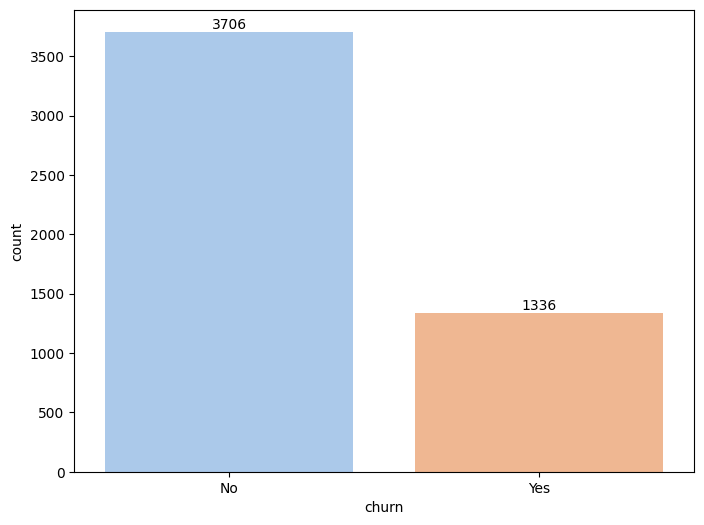

In [80]:
# Create the figure
plt.figure(figsize=(8, 6))

# Create the countplot with a palette
ax = sns.countplot(x='churn', data=Customer_churn, palette=sns.color_palette("pastel"))

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height()) # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### **Split Dataset into Training and Evaluation**

- X = input_data
- y = label

In [81]:
X = Customer_churn.drop('churn', axis=1)
y = Customer_churn['churn']

In [82]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3529, 19), (3529,), (1513, 19), (1513,))

In [83]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#### **Prepare Pipelines**

In [84]:
cat_cols = X.select_dtypes('object').columns
cat_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [85]:
num_cols = X.select_dtypes('number').columns
num_cols

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [86]:
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy = 'median')),
    ('num_scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat-encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

**Modeling**

In [87]:
# List of models with their names and corresponding classifiers
models = [
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state=42))
]

# Dictionary to store all pipelines
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    # Create a pipeline for each model
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train_encoded)

    #Predict on the test dataset
    y_pred = final_pipeline.predict(X_test)

    # Calculate evaluation metrics
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)  # Use y_test_encoded instead of y_train_encoded

    # Store metrics in the metrics table DataFrame
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    
    # Store the pipeline in the dictionary
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
metrics_table.sort_values(ascending=False, by='f1_score')


,model_name,accuracy,precision,recall,f1_score
1,Logistic_reg,0.781890,0.776100,0.781890,0.778502
3,random_forest,0.782551,0.771676,0.782551,0.774882
2,knn,0.768672,0.767576,0.768672,0.768111
0,Decision_tree,0.725711,0.734493,0.725711,0.729622


**Hyperparameter Tuning**

In [88]:
# Define the hyperparameters to search
param_grids = {
    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Logistic_reg': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },
    'knn': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11]
    },
    'random_forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    }
}

params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator=final_pipeline,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=['f1_weighted', 'precision', 'recall'],
        refit='f1_weighted',
        verbose=3,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
    
    search_history = pd.DataFrame(grid_search.cv_results_)
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Decision_tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}
Best parameters for Logistic_reg: {'classifier__C': 0.1, 'classifier__max_iter': 300, 'classifier__solver': 'lbfgs'}
Best parameters for knn: {'classifier__n_neighbors': 11}
Best parameters for random_forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}


In [89]:
# Create an empty DataFrame for metrics
# Get the models with the best hyperparameters
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))

    return best_models

best_models = get_best_models(params)

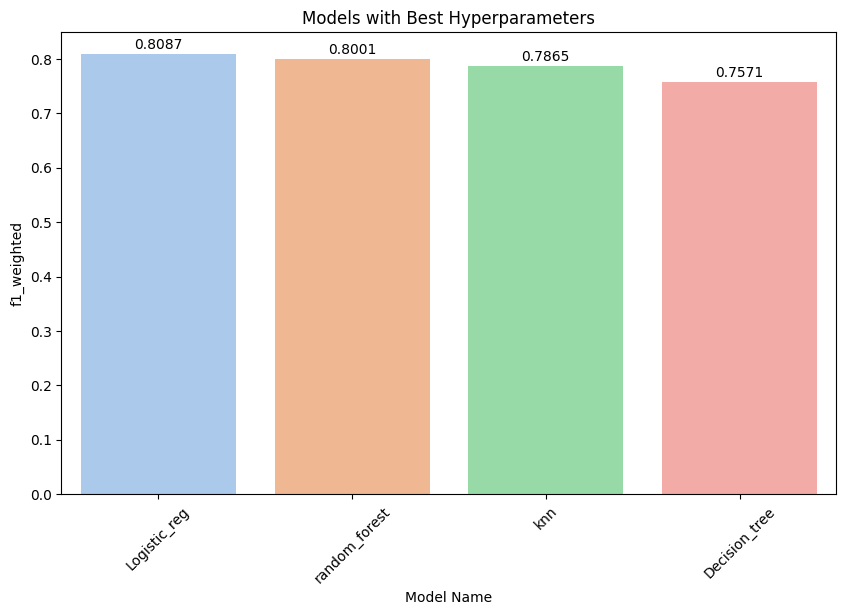

In [90]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)

# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=df_models, x='model_name', y='f1_score', palette=sns.color_palette("pastel"))

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()
